- Inspired from demo.ipynb in NGSIM.jl
- Takeaways
    - 101 has 5 segments
    - Start from bottom of screen, 1 is bottom of screen, 2 is exit ramp,
    3 is straight section, 4 is entry to road till entry ramp 
    join point, 5 is entry ramp

In [2]:
using NGSIM
using AutomotiveDrivingModels
using AutoViz
using Interact # For slider bar trajectory propagation

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5dc1e185f8b2175037a0bb4bac5baa1c8ca39ea5-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5dc1e185f8b2175037a0bb4bac5baa1c8ca39ea5-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [3]:
roadway = ROADWAY_101;

# Overlay to highlight segments of roadway101

In [3]:
struct LaneOverlay <: SceneOverlay
    lane::Lane
    color::Colorant
end

function AutoViz.render!(rendermodel::RenderModel, overlay::LaneOverlay, scene::Scene, roadway::Roadway)
    render!(rendermodel, overlay.lane, roadway, color_asphalt=overlay.color) # this display a lane with the specified color
    return rendermodel
end

In [9]:
td = load_trajdata(1)
scene = get!(Scene(500), td, 1000);

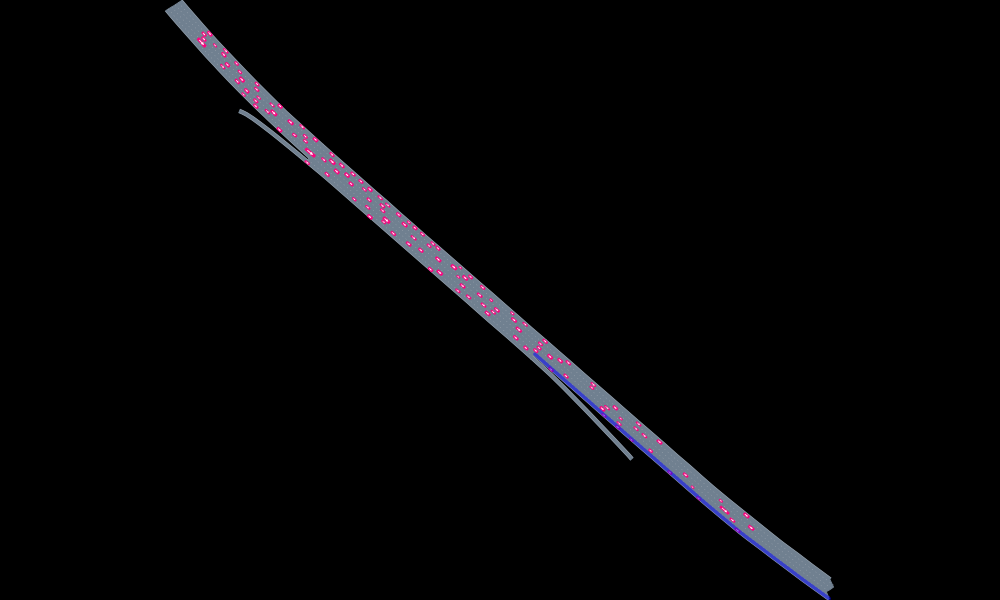

In [10]:
lane_overlay = LaneOverlay(roadway[LaneTag(1,1)], RGBA(0.0,0.0,1.0,0.5))
render(scene, roadway, [lane_overlay], cam=FitToContentCamera(0.))

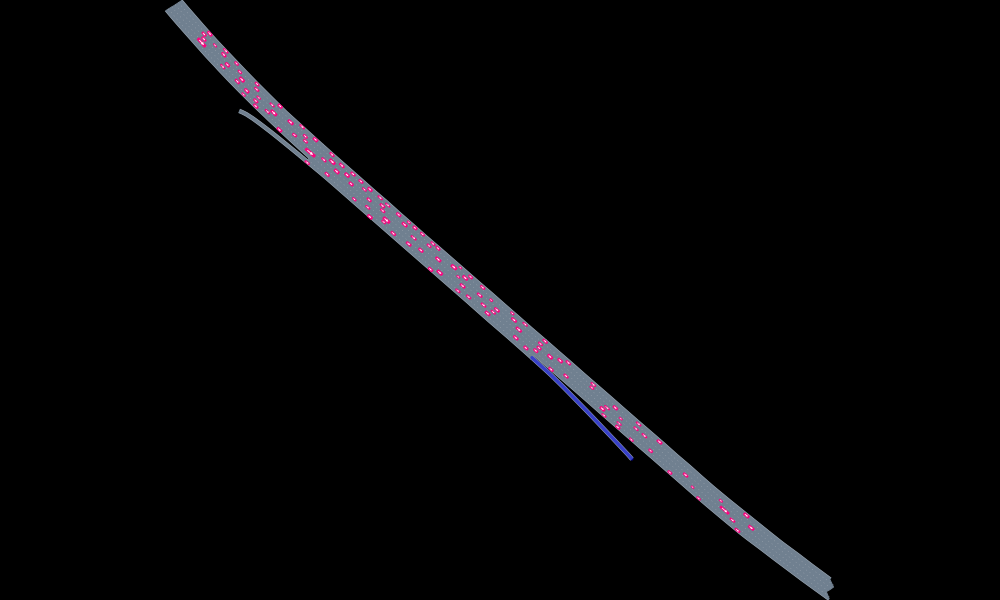

In [11]:
lane_overlay = LaneOverlay(roadway[LaneTag(2,1)], RGBA(0.0,0.0,1.0,0.5))
render(scene, roadway, [lane_overlay], cam=FitToContentCamera(0.))

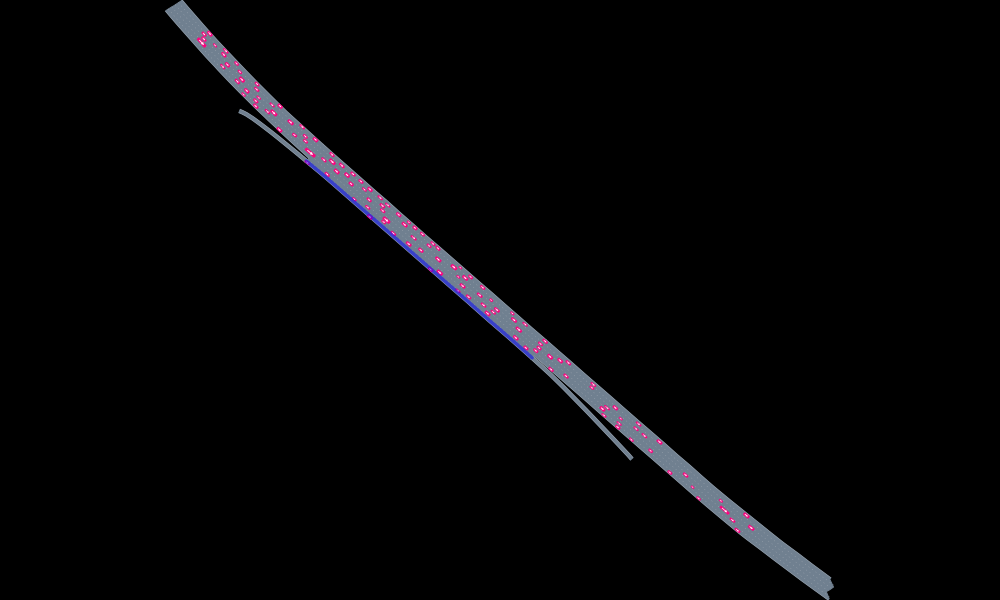

In [12]:
lane_overlay = LaneOverlay(roadway[LaneTag(3,1)], RGBA(0.0,0.0,1.0,0.5))
render(scene, roadway, [lane_overlay], cam=FitToContentCamera(0.))

# Segment highlighting ends here

In [21]:
fieldnames(Scene(500).entities[1])
Scene(500).entities[24].state

VehicleState(VecSE2({0.000, 0.000}, 0.000), Frenet(RoadIndex({140268025984096, 0.000000}, {140268015226528, 140268023109652}), 0.000, 0.000, 0.000), 0.000)

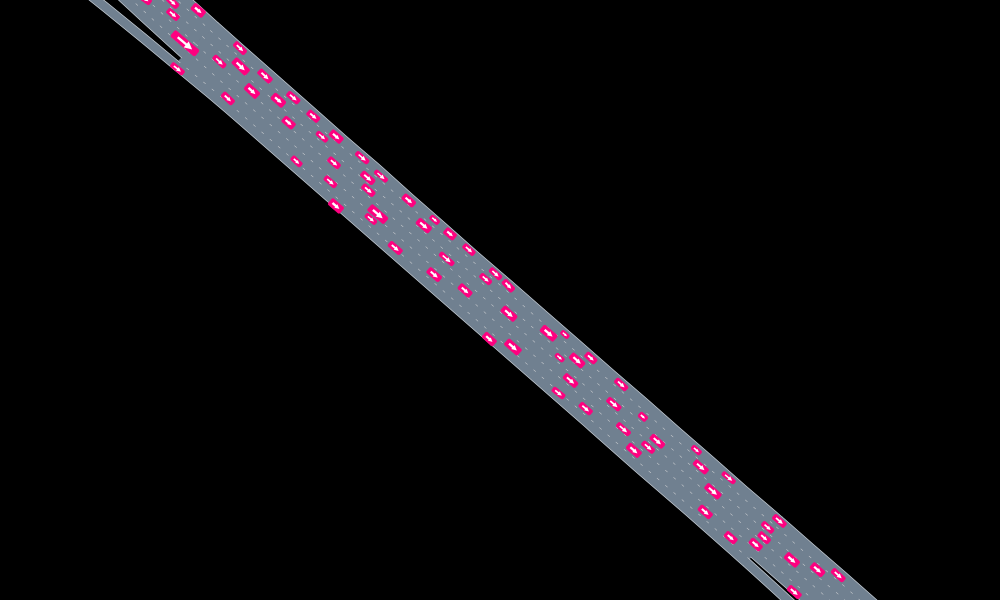

In [6]:
render(scene, ROADWAY_101)

In [ ]:
length(scene) #108
fieldnames(scene) #n, entitities
typeof(scene.entities) # array of records
size(scene.entities) #500
typeof(scene.entities[1]) # Records.entity
fieldnames(scene.entities[1])

## Video making using recorded cars on ngsim
- Trajdatas is what the car trajectories are stored in
- We want to color the ego vehicle differently to be able to see it

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_92", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-2f578667-91cc-41ef-9219-3887051282ff", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 2000),Pair{Symbol,Any}(:min, 1000),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_91", 1500, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/raunak/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/raunak/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/raunak/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/raunak/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/raunak/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1500}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return
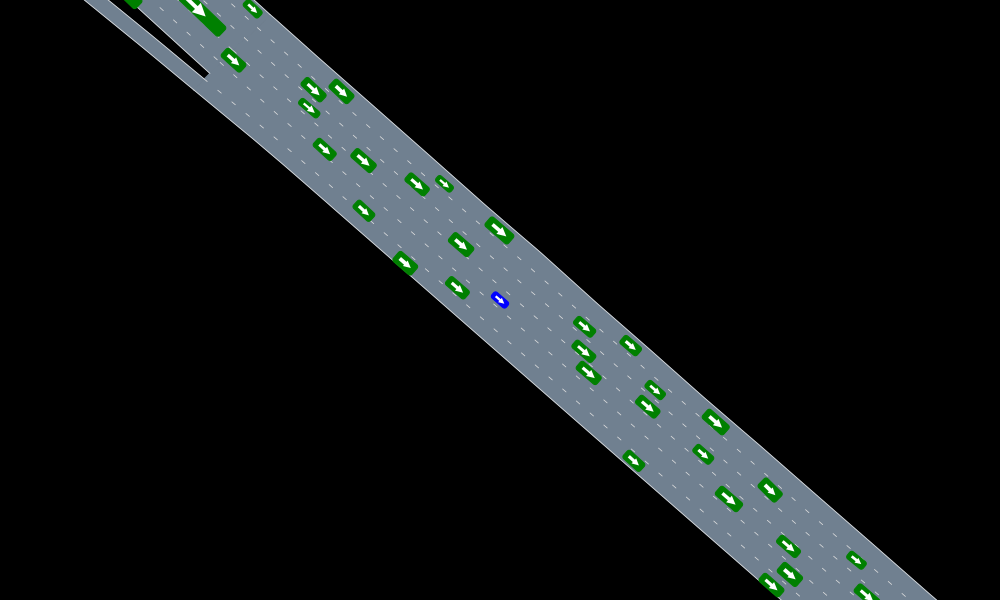
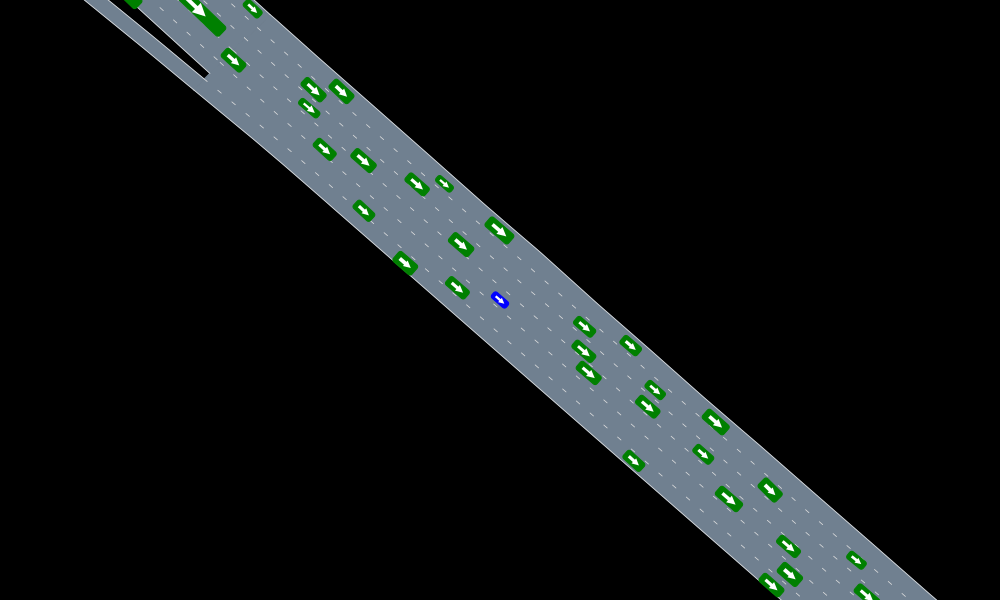

In [22]:
# argument 1 loads i101 7:50 to 8:05.
# load_trajdata function defined in NGSIM.jl/src/trajdata.jl
td1 = load_trajdata(1); 

scene = Scene(500)
egoid = 546
@manipulate for i in 1000:2000
    temp_scene = get!(scene,td1,i)
    
    carcolors = Dict{Int,Colorant}()
    for veh in temp_scene
        #@show veh.id
        # if veh id matches the egoid color it blue otherwise green
        carcolors[veh.id] = 
        in(veh.id, egoid) ? colorant"blue" : colorant"green"
    end
    render(temp_scene, ROADWAY_101, 
        cam=CarFollowCamera{Int}(546,5.0),
#         cam=StaticCamera(VecE2(1966400, 570900), 5.0),
#         cam=FitToContentCamera(0.),
        car_colors=carcolors)
end

# Don't reinvent the wheel: Use existing environment

In [22]:
using AutoEnvs

n_veh = 1
    filepath = Pkg.dir("NGSIM", "data", "trajdata_i101_trajectories-0805am-0820am.txt")
    params = Dict(
        "trajectory_filepaths"=>[filepath],
        "H"=>50,
        "primesteps"=>50,
        "n_veh"=>n_veh,
        "remove_ngsim_veh"=>true
)
# env = MultiagentNGSIMEnvVideoMaker(params)
env = MultiagentNGSIMEnv(params);

In [26]:
# This will create a series of images in /tmp/episode1
# You can open the first and then press right arrow
reset(env)
a = ones(n_veh, 2)

for _ in 1:50
    render(env)
    x, r, terminal, _ = step(env, a)
end

LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw)) <type 'exceptions.RuntimeError'>
RuntimeError('Julia exception: MethodError(start, (AutoEnvs.MultiagentNGSIMEnv(Records.ListRecord[Trajdata(10000 frames)], Dict[Dict{Any,Any}(Pair{Any,Any}(1760, Dict("te"=>7438,"ts"=>6471)),Pair{Any,Any}(306, Dict("te"=>2142,"ts"=>1538)),Pair{Any,Any}(1333, Dict("te"=>5850,"ts"=>5284)),Pair{Any,Any}(1671, Dict("te"=>7149,"ts"=>6250)),Pair{Any,Any}(2553, Dict("te"=>9500,"ts"=>9049)),Pair{Any,Any}(74, Dict("te"=>1157,"ts"=>599)),Pair{Any,Any}(1662, Dict("te"=>7189,"ts"=>6138)),Pair{Any,Any}(1469, Dict("te"=>6284,"ts"=>5683)),Pair{Any,Any}(2308, Dict("te"=>9011,"ts"=>8303)),Pair{Any,Any}(285, Dict("te"=>1938,"ts"=>1466)),Pair{Any,Any}(1881, Dict("te"=>7746,"ts"=>6804)),Pair{Any,Any}(2420, Dict("te"=>9289,"ts"=>8684)),Pair{Any,Any}(1481, Dict("te"=>6329,"ts"=>5715)),Pair{Any,Any}(318, Dict("te"=>2075,"ts"=>1590)),Pair{Any,Any}(1124, Dict("te"=>5201,"ts"=>4692)),Pair{Any,Any}(2351, Dict("te"=>9169,"ts"=>8496)),Pair{Any,Any}(1337, Dict("te"=>5842,"ts"=>5299)),Pair{Any,Any}(1273, Dict("te"=>5618,"ts"=>5162)),Pair{Any,Any}(2597, Dict("te"=>9500,"ts"=>9198)),Pair{Any,Any}(975, Dict("te"=>4824,"ts"=>4166)),Pair{Any,Any}(354, Dict("te"=>2192,"ts"=>1718)),Pair{Any,Any}(610, Dict("te"=>3528,"ts"=>2558)),Pair{Any,Any}(2300, Dict("te"=>8974,"ts"=>8312)),Pair{Any,Any}(1929, Dict("te"=>7862,"ts"=>6982)),Pair{Any,Any}(1082, Dict("te"=>5091,"ts"=>4720)),Pair{Any,Any}(117, Dict("te"=>1348,"ts"=>766)),Pair{Any,Any}(1400, Dict("te"=>6018,"ts"=>5505)),Pair{Any,Any}(1327, Dict("te"=>5804,"ts"=>5296)),Pair{Any,Any}(1714, Dict("te"=>7346,"ts"=>6336)),Pair{Any,Any}(474, Dict("te"=>3134,"ts"=>2194)),Pair{Any,Any}(2009, Dict("te"=>8096,"ts"=>7181)),Pair{Any,Any}(1616, Dict("te"=>7051,"ts"=>6116)),Pair{Any,Any}(353, Dict("te"=>2305,"ts"=>1709)),Pair{Any,Any}(430, Dict("te"=>2891,"ts"=>1917)),Pair{Any,Any}(2251, Dict("te"=>8870,"ts"=>8164)),Pair{Any,Any}(79, Dict("te"=>1162,"ts"=>596)),Pair{Any,Any}(1640, Dict("te"=>7119,"ts"=>6163)),Pair{Any,Any}(1479, Dict("te"=>6217,"ts"=>5727)),Pair{Any,Any}(2396, Dict("te"=>9301,"ts"=>8628)),Pair{Any,Any}(154, Dict("te"=>1441,"ts"=>924)),Pair{Any,Any}(1331, Dict("te"=>5830,"ts"=>5286)),Pair{Any,Any}(2071, Dict("te"=>8344,"ts"=>7431)),Pair{Any,Any}(107, Dict("te"=>1310,"ts"=>725)),Pair{Any,Any}(416, Dict("te"=>2848,"ts"=>1917)),Pair{Any,Any}(2525, Dict("te"=>9500,"ts"=>9000)),Pair{Any,Any}(10, Dict("te"=>898,"ts"=>500)),Pair{Any,Any}(642, Dict("te"=>3346,"ts"=>2618)),Pair{Any,Any}(162, Dict("te"=>1490,"ts"=>964)),Pair{Any,Any}(240, Dict("te"=>1757,"ts"=>1290)),Pair{Any,Any}(974, Dict("te"=>4808,"ts"=>4185)),Pair{Any,Any}(2571, Dict("te"=>9500,"ts"=>9107)),Pair{Any,Any}(2103, Dict("te"=>8429,"ts"=>7475)),Pair{Any,Any}(2414, Dict("te"=>9367,"ts"=>8649)),Pair{Any,Any}(5, Dict("te"=>855,"ts"=>500)),Pair{Any,Any}(1146, Dict("te"=>5276,"ts"=>4758)),Pair{Any,Any}(2114, Dict("te"=>8476,"ts"=>7419)),Pair{Any,Any}(1230, Dict("te"=>5530,"ts"=>5084)),Pair{Any,Any}(2613, Dict("te"=>9500,"ts"=>9251)),Pair{Any,Any}(1097, Dict("te"=>5125,"ts"=>4647)),Pair{Any,Any}(1817, Dict("te"=>7615,"ts"=>6623)),Pair{Any,Any}(776, Dict("te"=>4142,"ts"=>3381)),Pair{Any,Any}(1324, Dict("te"=>5826,"ts"=>5280)),Pair{Any,Any}(573, Dict("te"=>3497,"ts"=>2274)),Pair{Any,Any}(512, Dict("te"=>3175,"ts"=>2373)),Pair{Any,Any}(2325, Dict("te"=>9058,"ts"=>8399)),Pair{Any,Any}(90, Dict("te"=>1199,"ts"=>661)),Pair{Any,Any}(396, Dict("te"=>2509,"ts"=>1913)),Pair{Any,Any}(2229, Dict("te"=>8770,"ts"=>8088)),Pair{Any,Any}(1201, Dict("te"=>5452,"ts"=>4953)),Pair{Any,Any}(1017, Dict("te"=>4889,"ts"=>4334)),Pair{Any,Any}(592, Dict("te"=>3484,"ts"=>2507)),Pair{Any,Any}(973, Dict("te"=>4760,"ts"=>4063)),Pair{Any,Any}(1418, Dict("te"=>6136,"ts"=>5537)),Pair{Any,Any}(655, Dict("te"=>3763,"ts"=>2737)),Pair{Any,Any}(1873, Dict("te"=>7723,"ts"=>6781)),Pair{Any,Any}(620, Dict("te"=>3628,"ts"=>2589)),Pair{Any,Any}(965, Dict("te"=>4787,"ts"=>4348)),Pair{Any,Any}(146, Dict("te"=>1442,"ts"=>888)),Pair{Any,Any}(130, Dict("te"=>1385,"ts"=>801)),Pair{Any,Any}(1148, Dict("te"=>5261,"ts"=>4785)),Pair{Any,Any}(545, Dict("te"=>3293,"ts"=>2488)),Pair{Any,Any}(1475, Dict("te"=>6453,"ts"=>5723)),Pair{Any,Any}(1062, Dict("te"=>5042,"ts"=>4476)),Pair{Any,Any}(1985, Dict("te"=>8030,"ts"=>7085)),Pair{Any,Any}(110, Dict("te"=>1325,"ts"=>747)),Pair{Any,Any}(1813, Dict("te"=>7592,"ts"=>6612)),Pair{Any,Any}(981, Dict("te"=>4827,"ts"=>4417)),Pair{Any,Any}(1150, Dict("te"=>5287,"ts"=>4785)),Pair{Any,Any}(525, Dict("te"=>3385,"ts"=>2354)),Pair{Any,Any}(1029, Dict("te"=>4929,"ts"=>4331)),Pair{Any,Any}(899, Dict("te"=>4542,"ts"=>3746)),Pair{Any,Any}(366, Dict("te"=>2262,"ts"=>1762)),Pair{Any,Any}(556, Dict("te"=>3431,"ts"=>2473)),Pair{Any,Any}(2302, Dict("te"=>8966,"ts"=>8307)),Pair{Any,Any}(128, Dict("te"=>1352,"ts"=>839)),Pair{Any,Any}(1722, Dict("te"=>7356,"ts"=>6347)),Pair{Any,Any}(1417, Dict("te"=>6133,"ts"=>5588)),Pair{Any,Any}(2277, Dict("te"=>8927,"ts"=>8233)),Pair{Any,Any}(831, Dict("te"=>4371,"ts"=>3578)),Pair{Any,Any}(183, Dict("te"=>1545,"ts"=>1030)),Pair{Any,Any}(522, Dict("te"=>3171,"ts"=>2400)),Pair{Any,Any}(931, Dict("te"=>4626,"ts"=>3897)),Pair{Any,Any}(345, Dict("te"=>2495,"ts"=>1706)),Pair{Any,Any}(152, Dict("te"=>1449,"ts"=>907)),Pair{Any,Any}(742, Dict("te"=>4090,"ts"=>3206)),Pair{Any,Any}(723, Dict("te"=>3876,"ts"=>3428)),Pair{Any,Any}(843, Dict("te"=>4406,"ts"=>3983)),Pair{Any,Any}(2359, Dict("te"=>9156,"ts"=>8646)),Pair{Any,Any}(982, Dict("te"=>4794,"ts"=>4124)),Pair{Any,Any}(1703, Dict("te"=>7281,"ts"=>6303)),Pair{Any,Any}(2075, Dict("te"=>8361,"ts"=>7381)),Pair{Any,Any}(2050, Dict("te"=>8208,"ts"=>7366)),Pair{Any,Any}(2243, Dict("te"=>8837,"ts"=>8133)),Pair{Any,Any}(1008, Dict("te"=>4865,"ts"=>4238)),Pair{Any,Any}(1274, Dict("te"=>5669,"ts"=>5162)),Pair{Any,Any}(454, Dict("te"=>2990,"ts"=>2101)),Pair{Any,Any}(312, Dict("te"=>2296,"ts"=>1581)),Pair{Any,Any}(663, Dict("te"=>3836,"ts"=>2751)),Pair{Any,Any}(446, Dict("te"=>2971,"ts"=>2017)),Pair{Any,Any}(751, Dict("te"=>4095,"ts"=>3124)),Pair{Any,Any}(2380, Dict("te"=>9209,"ts"=>8580)),Pair{Any,Any}(2097, Dict("te"=>8388,"ts"=>7450)),Pair{Any,Any}(659, Dict("te"=>3734,"ts"=>2765)),Pair{Any,Any}(241, Dict("te"=>1793,"ts"=>1298)),Pair{Any,Any}(370, Dict("te"=>2606,"ts"=>1767)),Pair{Any,Any}(197, Dict("te"=>1649,"ts"=>1119)),Pair{Any,Any}(1933, Dict("te"=>7827,"ts"=>7339)),Pair{Any,Any}(142, Dict("te"=>1390,"ts"=>933)),Pair{Any,Any}(935, Dict("te"=>4656,"ts"=>3887)),Pair{Any,Any}(848, Dict("te"=>4396,"ts"=>3604)),Pair{Any,Any}(614, Dict("te"=>3552,"ts"=>2761)),Pair{Any,Any}(1694, Dict("te"=>7187,"ts"=>6459)),Pair{Any,Any}(2347, Dict("te"=>9145,"ts"=>8445)),Pair{Any,Any}(433, Dict("te"=>2620,"ts"=>2173)),Pair{Any,Any}(1107, Dict("te"=>5191,"ts"=>4629)),Pair{Any,Any}(677, Dict("te"=>3877,"ts"=>2816)),Pair{Any,Any}(1381, Dict("te"=>5972,"ts"=>5450)),Pair{Any,Any}(2241, Dict("te"=>8799,"ts"=>8142)),Pair{Any,Any}(2203, Dict("te"=>8718,"ts"=>7985)),Pair{Any,Any}(1540, Dict("te"=>6550,"ts"=>5861)),Pair{Any,Any}(890, Dict("te"=>4472,"ts"=>3770)),Pair{Any,Any}(958, Dict("te"=>4713,"ts"=>4052)),Pair{Any,Any}(672, Dict("te"=>3737,"ts"=>2750)),Pair{Any,Any}(1906, Dict("te"=>7885,"ts"=>6962)),Pair{Any,Any}(94, Dict("te"=>1243,"ts"=>696)),Pair{Any,Any}(115, Dict("te"=>1340,"ts"=>744)),Pair{Any,Any}(2166, Dict("te"=>8594,"ts"=>7869)),Pair{Any,Any}(1984, Dict("te"=>8023,"ts"=>7139)),Pair{Any,Any}(418, Dict("te"=>2549,"ts"=>2108)),Pair{Any,Any}(373, Dict("te"=>2533,"ts"=>1787)),Pair{Any,Any}(455, Dict("te"=>2660,"ts"=>2254)),Pair{Any,Any}(1496, Dict("te"=>6573,"ts"=>5773)),Pair{Any,Any}(426, Dict("te"=>2880,"ts"=>1943)),Pair{Any,Any}(1211, Dict("te"=>5458,"ts"=>4997)),Pair{Any,Any}(503, Dict("te"=>2644,"ts"=>2347)),Pair{Any,Any}(2494, Dict("te"=>9500,"ts"=>8902)),Pair{Any,Any}(914, Dict("te"=>4566,"ts"=>3837)),Pair{Any,Any}(859, Dict("te"=>4427,"ts"=>3696)),Pair{Any,Any}(1209, Dict("te"=>5491,"ts"=>5016)),Pair{Any,Any}(2572, Dict("te"=>9500,"ts"=>9035)),Pair{Any,Any}(471, Dict("te"=>3106,"ts"=>2021)),Pair{Any,Any}(707, Dict("te"=>3900,"ts"=>3167)),Pair{Any,Any}(1655, Dict("te"=>7147,"ts"=>6198)),Pair{Any,Any}(393, Dict("te"=>2711,"ts"=>1830)),Pair{Any,Any}(497, Dict("te"=>3123,"ts"=>2292)),Pair{Any,Any}(1167, Dict("te"=>5353,"ts"=>4879)),Pair{Any,Any}(1759, Dict("te"=>7464,"ts"=>6476)),Pair{Any,Any}(2580, Dict("te"=>9500,"ts"=>9125)),Pair{Any,Any}(1602, Dict("te"=>7000,"ts"=>6061)),Pair{Any,Any}(1802, Dict("te"=>7569,"ts"=>6582)),Pair{Any,Any}(2093, Dict("te"=>8437,"ts"=>7492)),Pair{Any,Any}(1782, Dict("te"=>7476,"ts"=>6516)),Pair{Any,Any}(1858, Dict("te"=>7717,"ts"=>6727)),Pair{Any,Any}(1430, Dict("te"=>6180,"ts"=>5579)),Pair{Any,Any}(377, Dict("te"=>2295,"ts"=>1831)),Pair{Any,Any}(1245, Dict("te"=>5583,"ts"=>5079)),Pair{Any,Any}(1382, Dict("te"=>5969,"ts"=>5437)),Pair{Any,Any}(1751, Dict("te"=>7413,"ts"=>6446)),Pair{Any,Any}(1740, Dict("te"=>7387,"ts"=>6291)),Pair{Any,Any}(2236, Dict("te"=>8855,"ts"=>8116)),Pair{Any,Any}(1018, Dict("te"=>4742,"ts"=>4311)),Pair{Any,Any}(1044, Dict("te"=>4977,"ts"=>4461)),Pair{Any,Any}(1926, Dict("te"=>7927,"ts"=>7022)),Pair{Any,Any}(1506, Dict("te"=>6486,"ts"=>5776)),Pair{Any,Any}(1114, Dict("te"=>5204,"ts"=>4650)),Pair{Any,Any}(2154, Dict("te"=>8565,"ts"=>7719)),Pair{Any,Any}(254, Dict("te"=>1860,"ts"=>1350)),Pair{Any,Any}(628, Dict("te"=>3213,"ts"=>2863)),Pair{Any,Any}(1702, Dict("te"=>7198,"ts"=>6486)),Pair{Any,Any}(20, Dict("te"=>920,"ts"=>500)),Pair{Any,Any}(2168, Dict("te"=>8627,"ts"=>7803)),Pair{Any,Any}(1644, Dict("te"=>7040,"ts"=>6350)),Pair{Any,Any}(1134, Dict("te"=>5222,"ts"=>4734)),Pair{Any,Any}(2245, Dict("te"=>8798,"ts"=>8125)),Pair{Any,Any}(451, Dict("te"=>2939,"ts"=>2024)),Pair{Any,Any}(166, Dict("te"=>1526,"ts"=>983)),Pair{Any,Any}(397, Dict("te"=>2737,"ts"=>1851)),Pair{Any,Any}(35, Dict("te"=>1004,"ts"=>500)),Pair{Any,Any}(1126, Dict("te"=>5194,"ts"=>4730)),Pair{Any,Any}(1157, Dict("te"=>5315,"ts"=>4813)),Pair{Any,Any}(1109, Dict("te"=>5180,"ts"=>4625)),Pair{Any,Any}(2301, Dict("te"=>8989,"ts"=>8278)),Pair{Any,Any}(1571, Dict("te"=>6513,"ts"=>5984)),Pair{Any,Any}(816, Dict("te"=>4334,"ts"=>3560)),Pair{Any,Any}(286, Dict("te"=>1948,"ts"=>1482)),Pair{Any,Any}(392, Dict("te"=>2636,"ts"=>1868)),Pair{Any,Any}(554, Dict("te"=>3328,"ts"=>2488)),Pair{Any,Any}(346, Dict("te"=>2492,"ts"=>1686)),Pair{Any,Any}(126, Dict("te"=>1310,"ts"=>818)),Pair{Any,Any}(303, Dict("te"=>2033,"ts"=>1552)),Pair{Any,Any}(567, Dict("te"=>3445,"ts"=>2459)),Pair{Any,Any}(883, Dict("te"=>4468,"ts"=>3697)),Pair{Any,Any}(237, Dict("te"=>1586,"ts"=>1289)),Pair{Any,Any}(594, Dict("te"=>3556,"ts"=>2425)),Pair{Any,Any}(386, Dict("te"=>2700,"ts"=>1813)),Pair{Any,Any}(1530, Dict("te"=>6177,"ts"=>5888)),Pair{Any,Any}(1213, Dict("te"=>5462,"ts"=>5007)),Pair{Any,Any}(517, Dict("te"=>3339,"ts"=>2316)),Pair{Any,Any}(1691, Dict("te"=>7258,"ts"=>6220)),Pair{Any,Any}(2527, Dict("te"=>9500,"ts"=>8982)),Pair{Any,Any}(949, Dict("te"=>4687,"ts"=>3975)),Pair{Any,Any}(1551, Dict("te"=>6839,"ts"=>5898)),Pair{Any,Any}(523, Dict("te"=>3427,"ts"=>2322)),Pair{Any,Any}(1309, Dict("te"=>5775,"ts"=>5260)),Pair{Any,Any}(1580, Dict("te"=>6536,"ts"=>6016)),Pair{Any,Any}(504, Dict("te"=>3295,"ts"=>2127)),Pair{Any,Any}(98, Dict("te"=>1251,"ts"=>696)),Pair{Any,Any}(666, Dict("te"=>3770,"ts"=>2985)),Pair{Any,Any}(2212, Dict("te"=>8780,"ts"=>7981)),Pair{Any,Any}(540, Dict("te"=>3499,"ts"=>2412)),Pair{Any,Any}(161, Dict("te"=>1476,"ts"=>939)),Pair{Any,Any}(952, Dict("te"=>4652,"ts"=>4060)),Pair{Any,Any}(1896, Dict("te"=>7811,"ts"=>6940)),Pair{Any,Any}(2161, Dict("te"=>8573,"ts"=>7828)),Pair{Any,Any}(22, Dict("te"=>910,"ts"=>500)),Pair{Any,Any}(73, Dict("te"=>1114,"ts"=>596)),Pair{Any,Any}(119, Dict("te"=>1354,"ts"=>770)),Pair{Any,Any}(2030, Dict("te"=>8165,"ts"=>7229)),Pair{Any,Any}(2487, Dict("te"=>9258,"ts"=>8902)),Pair{Any,Any}(222, Dict("te"=>1732,"ts"=>1207)),Pair{Any,Any}(646, Dict("te"=>3633,"ts"=>2656)),Pair{Any,Any}(1514, Dict("te"=>6648,"ts"=>5794)),Pair{Any,Any}(580, Dict("te"=>3472,"ts"=>2660)),Pair{Any,Any}(687, Dict("te"=>3842,"ts"=>2805)),Pair{Any,Any}(640, Dict("te"=>3721,"ts"=>2689)),Pair{Any,Any}(502, Dict("te"=>3083,"ts"=>2314)),Pair{Any,Any}(498, Dict("te"=>3270,"ts"=>2109)),Pair{Any,Any}(603, Dict("te"=>3606,"ts"=>2696)),Pair{Any,Any}(1423, Dict("te"=>6172,"ts"=>5568)),Pair{Any,Any}(1826, Dict("te"=>7050,"ts"=>6736)),Pair{Any,Any}(1629, Dict("te"=>7093,"ts"=>6145)),Pair{Any,Any}(131, Dict("te"=>1318,"ts"=>854)),Pair{Any,Any}(391, Dict("te"=>2367,"ts"=>1899)),Pair{Any,Any}(249, Dict("te"=>1824,"ts"=>1335)),Pair{Any,Any}(1532, Dict("te"=>6731,"ts"=>5841)),Pair{Any,Any}(207, Dict("te"=>1629,"ts"=>1141)),Pair{Any,Any}(173, Dict("te"=>1554,"ts"=>1024)),Pair{Any,Any}(1565, Dict("te"=>6249,"ts"=>5993)),Pair{Any,Any}(1891, Dict("te"=>7855,"ts"=>6928)),Pair{Any,Any}(1261, Dict("te"=>5421,"ts"=>5144)),Pair{Any,Any}(2106, Dict("te"=>8451,"ts"=>7498)),Pair{Any,Any}(1735, Dict("te"=>7357,"ts"=>6373)),Pair{Any,Any}(1015, Dict("te"=>4884,"ts"=>4252)),Pair{Any,Any}(2177, Dict("te"=>8645,"ts"=>7845)),Pair{Any,Any}(70, Dict("te"=>1122,"ts"=>545)),Pair{Any,Any}(625, Dict("te"=>3558,"ts"=>2596)),Pair{Any,Any}(1129, Dict("te"=>5204,"ts"=>4681)),Pair{Any,Any}(1385, Dict("te"=>5989,"ts"=>5435)),Pair{Any,Any}(1513, Dict("te"=>6348,"ts"=>5954)),Pair{Any,Any}(2318, Dict("te"=>9036,"ts"=>8377)),Pair{Any,Any}(2557, Dict("te"=>9500,"ts"=>9140)),Pair{Any,Any}(1326, Dict("te"=>5836,"ts"=>5270)),Pair{Any,Any}(1060, Dict("te"=>5010,"ts"=>4505)),Pair{Any,Any}(327, Dict("te"=>2114,"ts"=>1630)),Pair{Any,Any}(511, Dict("te"=>3297,"ts"=>2278)),Pair{Any,Any}(1949, Dict("te"=>7940,"ts"=>7042)),Pair{Any,Any}(1797, Dict("te"=>7523,"ts"=>6556)),Pair{Any,Any}(780, Dict("te"=>4210,"ts"=>3423)),Pair{Any,Any}(951, Dict("te"=>4642,"ts"=>3968)),Pair{Any,Any}(773, Dict("te"=>4111,"ts"=>3443)),Pair{Any,Any}(1545, Dict("te"=>6642,"ts"=>5896)),Pair{Any,Any}(2178, Dict("te"=>8654,"ts"=>7879)),Pair{Any,Any}(720, Dict("te"=>3854,"ts"=>3400)),Pair{Any,Any}(2056, Dict("te"=>8247,"ts"=>7342)),Pair{Any,Any}(326, Dict("te"=>2138,"ts"=>1605)),Pair{Any,Any}(248, Dict("te"=>1805,"ts"=>1303)),Pair{Any,Any}(1420, Dict("te"=>6082,"ts"=>5555)),Pair{Any,Any}(2064, Dict("te"=>8265,"ts"=>7306)),Pair{Any,Any}(447, Dict("te"=>2937,"ts"=>2073)),Pair{Any,Any}(2322, Dict("te"=>9048,"ts"=>8340)),Pair{Any,Any}(555, Dict("te"=>3329,"ts"=>2510)),Pair{Any,Any}(217, Dict("te"=>1685,"ts"=>1204)),Pair{Any,Any}(855, Dict("te"=>4393,"ts"=>3743)),Pair{Any,Any}(506, Dict("te"=>3110,"ts"=>2484)),Pair{Any,Any}(120, Dict("te"=>1341,"ts"=>776)),Pair{Any,Any}(1558, Dict("te"=>6786,"ts"=>5914)),Pair{Any,Any}(2085, Dict("te"=>8331,"ts"=>7499)),Pair{Any,Any}(143, Dict("te"=>1406,"ts"=>891)),Pair{Any,Any}(2469, Dict("te"=>9480,"ts"=>8830)),Pair{Any,Any}(62, Dict("te"=>1122,"ts"=>500)),Pair{Any,Any}(2437, Dict("te"=>9434,"ts"=>8727)),Pair{Any,Any}(996, Dict("te"=>4897,"ts"=>4248)),Pair{Any,Any}(1459, Dict("te"=>6254,"ts"=>5656)),Pair{Any,Any}(548, Dict("te"=>3359,"ts"=>2470)),Pair{Any,Any}(1355, Dict("te"=>5890,"ts"=>5365)),Pair{Any,Any}(2617, Dict("te"=>9500,"ts"=>9241)),Pair{Any,Any}(961, Dict("te"=>4712,"ts"=>4070)),Pair{Any,Any}(251, Dict("te"=>1836,"ts"=>1349)),Pair{Any,Any}(1250, Dict("te"=>5596,"ts"=>5098)),Pair{Any,Any}(649, Dict("te"=>3751,"ts"=>2864)),Pair{Any,Any}(656, Dict("te"=>3813,"ts"=>2732)),Pair{Any,Any}(1820, Dict("te"=>7583,"ts"=>6633)),Pair{Any,Any}(766, Dict("te"=>4118,"ts"=>3151)),Pair{Any,Any}(2418, Dict("te"=>9338,"ts"=>8683)),Pair{Any,Any}(2280, Dict("te"=>8892,"ts"=>8207)),Pair{Any,Any}(2249, Dict("te"=>8820,"ts"=>8135)),Pair{Any,Any}(909, Dict("te"=>4560,"ts"=>3756)),Pair{Any,Any}(1579, Dict("te"=>6842,"ts"=>5938)),Pair{Any,Any}(155, Dict("te"=>1498,"ts"=>918)),Pair{Any,Any}(569, Dict("te"=>3421,"ts"=>2566)),Pair{Any,Any}(1625, Dict("te"=>7066,"ts"=>6072)),Pair{Any,Any}(344, Dict("te"=>2430,"ts"=>1695)),Pair{Any,Any}(2073, Dict("te"=>8392,"ts"=>7716)),Pair{Any,Any}(787, Dict("te"=>4182,"ts"=>3520)),Pair{Any,Any}(747, Dict("te"=>4117,"ts"=>3251)),Pair{Any,Any}(1471, Dict("te"=>6373,"ts"=>5693)),Pair{Any,Any}(1963, Dict("te"=>7972,"ts"=>7092)),Pair{Any,Any}(929, Dict("te"=>4419,"ts"=>3921)),Pair{Any,Any}(253, Dict("te"=>1820,"ts"=>1333)),Pair{Any,Any}(1079, Dict("te"=>5098,"ts"=>4709)),Pair{Any,Any}(1610, Dict("te"=>7025,"ts"=>6089)),Pair{Any,Any}(2548, Dict("te"=>9500,"ts"=>9208)),Pair{Any,Any}(1120, Dict("te"=>5184,"ts"=>4703)),Pair{Any,Any}(815, Dict("te"=>4308,"ts"=>3504)),Pair{Any,Any}(2536, Dict("te"=>9500,"ts"=>8968)),Pair{Any,Any}(2415, Dict("te"=>9327,"ts"=>8671)),Pair{Any,Any}(2247, Dict("te"=>8764,"ts"=>8336)),Pair{Any,Any}(324, Dict("te"=>2387,"ts"=>1618)),Pair{Any,Any}(1322, Dict("te"=>5806,"ts"=>5396)),Pair{Any,Any}(858, Dict("te"=>4456,"ts"=>4004)),Pair{Any,Any}(13, Dict("te"=>870,"ts"=>500)),Pair{Any,Any}(1080, Dict("te"=>5068,"ts"=>4572)),Pair{Any,Any}(1800, Dict("te"=>7598,"ts"=>6481)),Pair{Any,Any}(1806, Dict("te"=>7575,"ts"=>6621)),Pair{Any,Any}(647, Dict("te"=>3759,"ts"=>2696)),Pair{Any,Any}(137, Dict("te"=>1361,"ts"=>887)),Pair{Any,Any}(105, Dict("te"=>1292,"ts"=>678)),Pair{Any,Any}(1547, Dict("te"=>6404,"ts"=>5910)),Pair{Any,Any}(765, Dict("te"=>4084,"ts"=>3395)),Pair{Any,Any}(307, Dict("te"=>2268,"ts"=>1561)),Pair{Any,Any}(1448, Dict("te"=>6238,"ts"=>5659)),Pair{Any,Any}(2233, Dict("te"=>8785,"ts"=>8115)),Pair{Any,Any}(273, Dict("te"=>1956,"ts"=>1427)),Pair{Any,Any}(1143, Dict("te"=>5308,"ts"=>4741)),Pair{Any,Any}(2398, Dict("te"=>9301,"ts"=>8568)),Pair{Any,Any}(1323, Dict("te"=>5802,"ts"=>5265)),Pair{Any,Any}(2116, Dict("te"=>8172,"ts"=>7656)),Pair{Any,Any}(1182, Dict("te"=>5375,"ts"=>4904)),Pair{Any,Any}(2605, Dict("te"=>9500,"ts"=>9220)),Pair{Any,Any}(100, Dict("te"=>1250,"ts"=>753)),Pair{Any,Any}(904, Dict("te"=>4587,"ts"=>4100)),Pair{Any,Any}(1555, Dict("te"=>6456,"ts"=>5951)),Pair{Any,Any}(2595, Dict("te"=>9500,"ts"=>9169)),Pair{Any,Any}(790, Dict("te"=>4227,"ts"=>3544)),Pair{Any,Any}(268, Dict("te"=>1864,"ts"=>1545)),Pair{Any,Any}(243, Dict("te"=>1783,"ts"=>1259)),Pair{Any,Any}(1612, Dict("te"=>6877,"ts"=>6113)),Pair{Any,Any}(317, Dict("te"=>2088,"ts"=>1579)),Pair{Any,Any}(1732, Dict("te"=>7404,"ts"=>6375)),Pair{Any,Any}(676, Dict("te"=>3396,"ts"=>3234)),Pair{Any,Any}(1425, Dict("te"=>6197,"ts"=>5580)),Pair{Any,Any}(108, Dict("te"=>1265,"ts"=>753)),Pair{Any,Any}(329, Dict("te"=>2414,"ts"=>1636)),Pair{Any,Any}(1262, Dict("te"=>5641,"ts"=>5132)),Pair{Any,Any}(755, Dict("te"=>4034,"ts"=>3151)),Pair{Any,Any}(2450, Dict("te"=>9438,"ts"=>8727)),Pair{Any,Any}(1312, Dict("te"=>5787,"ts"=>5253)),Pair{Any,Any}(144, Dict("te"=>1407,"ts"=>885)),Pair{Any,Any}(400, Dict("te"=>2522,"ts"=>1921)),Pair{Any,Any}(1849, Dict("te"=>7691,"ts"=>6709)),Pair{Any,Any}(2128, Dict("te"=>8511,"ts"=>7563)),Pair{Any,Any}(788, Dict("te"=>4264,"ts"=>3431)),Pair{Any,Any}(1285, Dict("te"=>5662,"ts"=>5184)),Pair{Any,Any}(375, Dict("te"=>2633,"ts"=>1778)),Pair{Any,Any}(494, Dict("te"=>3003,"ts"=>2269)),Pair{Any,Any}(1024, Dict("te"=>4902,"ts"=>4386)),Pair{Any,Any}(112, Dict("te"=>1285,"ts"=>766)),Pair{Any,Any}(544, Dict("te"=>3258,"ts"=>2469)),Pair{Any,Any}(1908, Dict("te"=>7876,"ts"=>6908)),Pair{Any,Any}(1310, Dict("te"=>5787,"ts"=>5257)),Pair{Any,Any}(106, Dict("te"=>1244,"ts"=>763)),Pair{Any,Any}(2618, Dict("te"=>9500,"ts"=>9155)),Pair{Any,Any}(2620, Dict("te"=>9500,"ts"=>9287)),Pair{Any,Any}(1811, Dict("te"=>7566,"ts"=>6609)),Pair{Any,Any}(1153, Dict("te"=>5289,"ts"=>4809)),Pair{Any,Any}(350, Dict("te"=>2516,"ts"=>1719)),Pair{Any,Any}(1823, Dict("te"=>7629,"ts"=>6641)),Pair{Any,Any}(585, Dict("te"=>3468,"ts"=>2495)),Pair{Any,Any}(1679, Dict("te"=>7236,"ts"=>6265)),Pair{Any,Any}(2371, Dict("te"=>9228,"ts"=>8565)),Pair{Any,Any}(54, Dict("te"=>1062,"ts"=>500)),Pair{Any,Any}(1972, Dict("te"=>7653,"ts"=>7171)),Pair{Any,Any}(337, Dict("te"=>2402,"ts"=>1664)),Pair{Any,Any}(60, Dict("te"=>1106,"ts"=>524)),Pair{Any,Any}(481, Dict("te"=>2829,"ts"=>2236)),Pair{Any,Any}(2484, Dict("te"=>9500,"ts"=>8851)),Pair{Any,Any}(1277, Dict("te"=>5684,"ts"=>5164)),Pair{Any,Any}(2544, Dict("te"=>9500,"ts"=>9033)),Pair{Any,Any}(1051, Dict("te"=>4994,"ts"=>4521)),Pair{Any,Any}(1320, Dict("te"=>5790,"ts"=>5260)),Pair{Any,Any}(2607, Dict("te"=>9500,"ts"=>9192)),Pair{Any,Any}(936, Dict("te"=>4599,"ts"=>3904)),Pair{Any,Any}(189, Dict("te"=>1611,"ts"=>1091)),Pair{Any,Any}(2147, Dict("te"=>8553,"ts"=>7661)),Pair{Any,Any}(398, Dict("te"=>2736,"ts"=>1828)),Pair{Any,Any}(913, Dict("te"=>4577,"ts"=>4134)),Pair{Any,Any}(875, Dict("te"=>4442,"ts"=>3810)),Pair{Any,Any}(896, Dict("te"=>4495,"ts"=>3719)),Pair{Any,Any}(2100, Dict("te"=>8390,"ts"=>7844)),Pair{Any,Any}(1676, Dict("te"=>7165,"ts"=>6259)),Pair{Any,Any}(1762, Dict("te"=>7466,"ts"=>6363)),Pair{Any,Any}(695, Dict("te"=>3859,"ts"=>2831)),Pair{Any,Any}(1838, Dict("te"=>7714,"ts"=>6757)),Pair{Any,Any}(380, Dict("te"=>2659,"ts"=>1788)),Pair{Any,Any}(1554, Dict("te"=>6754,"ts"=>5906)),Pair{Any,Any}(1649, Dict("te"=>7138,"ts"=>6195)),Pair{Any,Any}(1995, Dict("te"=>8038,"ts"=>7152)),Pair{Any,Any}(2012, Dict("te"=>8139,"ts"=>7151)),Pair{Any,Any}(68, Dict("te"=>1133,"ts"=>563)),Pair{Any,Any}(2311, Dict("te"=>8976,"ts"=>8337)),Pair{Any,Any}(2427, Dict("te"=>9382,"ts"=>8686)),Pair{Any,Any}(275, Dict("te"=>1927,"ts"=>1416)),Pair{Any,Any}(382, Dict("te"=>2419,"ts"=>1832)),Pair{Any,Any}(724, Dict("te"=>4042,"ts"=>3039)),Pair{Any,Any}(2299, Dict("te"=>8955,"ts"=>8305)),Pair{Any,Any}(547, Dict("te"=>3478,"ts"=>2391)),Pair{Any,Any}(1439, Dict("te"=>6210,"ts"=>5623)),Pair{Any,Any}(199, Dict("te"=>1627,"ts"=>1100)),Pair{Any,Any}(323, Dict("te"=>2378,"ts"=>1623)),Pair{Any,Any}(2366, Dict("te"=>9186,"ts"=>8513)),Pair{Any,Any}(669, Dict("te"=>3798,"ts"=>2776)),Pair{Any,Any}(2540, Dict("te"=>9500,"ts"=>8981)),Pair{Any,Any}(406, Dict("te"=>2696,"ts"=>1932)),Pair{Any,Any}(2379, Dict("te"=>9207,"ts"=>8573)),Pair{Any,Any}(652, Dict("te"=>3715,"ts"=>2929)),Pair{Any,Any}(2223, Dict("te"=>8725,"ts"=>8022)),Pair{Any,Any}(232, Dict("te"=>1762,"ts"=>1250)),Pair{Any,Any}(1243, Dict("te"=>5576,"ts"=>5083)),Pair{Any,Any}(83, Dict("te"=>989,"ts"=>681)),Pair{Any,Any}(1480, Dict("te"=>6228,"ts"=>5750)),Pair{Any,Any}(2074, Dict("te"=>8281,"ts"=>7467)),Pair{Any,Any}(2333, Dict("te"=>9081,"ts"=>8422)),Pair{Any,Any}(45, Dict("te"=>1009,"ts"=>500)),Pair{Any,Any}(954, Dict("te"=>4707,"ts"=>4005)),Pair{Any,Any}(662, Dict("te"=>3695,"ts"=>2692)),Pair{Any,Any}(1192, Dict("te"=>5428,"ts"=>4926)),Pair{Any,Any}(1334, Dict("te"=>5839,"ts"=>5415)),Pair{Any,Any}(808, Dict("te"=>4290,"ts"=>3636)),Pair{Any,Any}(2149, Dict("te"=>8564,"ts"=>7696)),Pair{Any,Any}(442, Dict("te"=>2963,"ts"=>1998)),Pair{Any,Any}(2489, Dict("te"=>9500,"ts"=>8881)),Pair{Any,Any}(976, Dict("te"=>4768,"ts"=>4206)),Pair{Any,Any}(2281, Dict("te"=>8832,"ts"=>8409)),Pair{Any,Any}(1023, Dict("te"=>4917,"ts"=>4303)),Pair{Any,Any}(1075, Dict("te"=>5088,"ts"=>4508)),Pair{Any,Any}(376, Dict("te"=>2276,"ts"=>1818)),Pair{Any,Any}(2267, Dict("te"=>8868,"ts"=>8243)),Pair{Any,Any}(61, Dict("te"=>1070,"ts"=>569)),Pair{Any,Any}(1489, Dict("te"=>6375,"ts"=>5738)),Pair{Any,Any}(1761, Dict("te"=>7454,"ts"=>6416)),Pair{Any,Any}(431, Dict("te"=>2914,"ts"=>1960)),Pair{Any,Any}(1160, Dict("te"=>5328,"ts"=>4825)),Pair{Any,Any}(304, Dict("te"=>2023,"ts"=>1542)),Pair{Any,Any}(476, Dict("te"=>3144,"ts"=>2036)),Pair{Any,Any}(629, Dict("te"=>3582,"ts"=>2615)),Pair{Any,Any}(361, Dict("te"=>2464,"ts"=>1746)),Pair{Any,Any}(772, Dict("te"=>4197,"ts"=>3494)),Pair{Any,Any}(2118, Dict("te"=>8483,"ts"=>7547)),Pair{Any,Any}(2551, Dict("te"=>9500,"ts"=>8996)),Pair{Any,Any}(1030, Dict("te"=>4947,"ts"=>4399)),Pair{Any,Any}(706, Dict("te"=>3927,"ts"=>2882)),Pair{Any,Any}(1104, Dict("te"=>5143,"ts"=>4655)),Pair{Any,Any}(2038, Dict("te"=>8262,"ts"=>7278)),Pair{Any,Any}(2222, Dict("te"=>8771,"ts"=>8058)),Pair{Any,Any}(1152, Dict("te"=>5327,"ts"=>4798)),Pair{Any,Any}(2303, Dict("te"=>8929,"ts"=>8274)),Pair{Any,Any}(2289, Dict("te"=>8651,"ts"=>8235)),Pair{Any,Any}(1215, Dict("te"=>5498,"ts"=>4993)),Pair{Any,Any}(288, Dict("te"=>1960,"ts"=>1485)),Pair{Any,Any}(1993, Dict("te"=>8042,"ts"=>7107)),Pair{Any,Any}(1805, Dict("te"=>7597,"ts"=>6569)),Pair{Any,Any}(1050, Dict("te"=>4990,"ts"=>4482)),Pair{Any,Any}(1889, Dict("te"=>7765,"ts"=>6830)),Pair{Any,Any}(2217, Dict("te"=>8753,"ts"=>8060)),Pair{Any,Any}(1000, Dict("te"=>4858,"ts"=>4307)),Pair{Any,Any}(1570, Dict("te"=>6813,"ts"=>5933)),Pair{Any,Any}(57, Dict("te"=>1086,"ts"=>517)),Pair{Any,Any}(2094, Dict("te"=>8330,"ts"=>7357)),Pair{Any,Any}(1617, Dict("te"=>6906,"ts"=>6127)),Pair{Any,Any}(799, Dict("te"=>4254,"ts"=>3597)),Pair{Any,Any}(2481, Dict("te"=>9500,"ts"=>8858)),Pair{Any,Any}(2139, Dict("te"=>8509,"ts"=>7638)),Pair{Any,Any}(445, Dict("te"=>2557,"ts"=>2081)),Pair{Any,Any}(252, Dict("te"=>1846,"ts"=>1368)),Pair{Any,Any}(1376, Dict("te"=>5991,"ts"=>5442)),Pair{Any,Any}(727, Dict("te"=>4062,"ts"=>3187)),Pair{Any,Any}(2141, Dict("te"=>8460,"ts"=>7606)),Pair{Any,Any}(49, Dict("te"=>1061,"ts"=>514)),Pair{Any,Any}(1827, Dict("te"=>7628,"ts"=>6657)),Pair{Any,Any}(716, Dict("te"=>3961,"ts"=>2931)),Pair{Any,Any}(2534, Dict("te"=>9500,"ts"=>9021)),Pair{Any,Any}(1466, Dict("te"=>6414,"ts"=>5700)),Pair{Any,Any}(1155, Dict("te"=>5303,"ts"=>4798)),Pair{Any,Any}(1549, Dict("te"=>6773,"ts"=>5874)),Pair{Any,Any}(2327, Dict("te"=>9075,"ts"=>8411)),Pair{Any,Any}(264, Dict("te"=>1879,"ts"=>1405)),Pair{Any,Any}(221, Dict("te"=>1727,"ts"=>1243)),Pair{Any,Any}(153, Dict("te"=>1465,"ts"=>955)),Pair{Any,Any}(579, Dict("te"=>3274,"ts"=>2689)),Pair{Any,Any}(590, Dict("te"=>3574,"ts"=>2660)),Pair{Any,Any}(1370, Dict("te"=>5943,"ts"=>5401)),Pair{Any,Any}(390, Dict("te"=>2463,"ts"=>1868)),Pair{Any,Any}(619, Dict("te"=>3657,"ts"=>2750)),Pair{Any,Any}(2004, Dict("te"=>8086,"ts"=>7097)),Pair{Any,Any}(484, Dict("te"=>3215,"ts"=>2067)),Pair{Any,Any}(1956, Dict("te"=>8006,"ts"=>7019)),Pair{Any,Any}(1089, Dict("te"=>5125,"ts"=>4555)),Pair{Any,Any}(129, Dict("te"=>1373,"ts"=>797)),Pair{Any,Any}(88, Dict("te"=>1208,"ts"=>653)),Pair{Any,Any}(429, Dict("te"=>2348,"ts"=>2010)),Pair{Any,Any}(1743, Dict("te"=>7342,"ts"=>6409)),Pair{Any,Any}(1945, Dict("te"=>7890,"ts"=>6946)),Pair{Any,Any}(1458, Dict("te"=>5987,"ts"=>5699)),Pair{Any,Any}(937, Dict("te"=>4641,"ts"=>3927)),Pair{Any,Any}(149, Dict("te"=>1428,"ts"=>932)),Pair{Any,Any}(439, Dict("te"=>2679,"ts"=>2043)),Pair{Any,Any}(1456, Dict("te"=>6380,"ts"=>5664)),Pair{Any,Any}(1729, Dict("te"=>7360,"ts"=>6263)),Pair{Any,Any}(2454, Dict("te"=>9461,"ts"=>8759)),Pair{Any,Any}(2087, Dict("te"=>8345,"ts"=>7409)),Pair{Any,Any}(2272, Dict("te"=>8774,"ts"=>8195)),Pair{Any,Any}(2412, Dict("te"=>9304,"ts"=>8806)),Pair{Any,Any}(210, Dict("te"=>1694,"ts"=>1157)),Pair{Any,Any}(2211, Dict("te"=>8740,"ts"=>8027)),Pair{Any,Any}(1635, Dict("te"=>7129,"ts"=>6063)),Pair{Any,Any}(1822, Dict("te"=>7601,"ts"=>6651)),Pair{Any,Any}(2057, Dict("te"=>8309,"ts"=>7590)),Pair{Any,Any}(2259, Dict("te"=>8896,"ts"=>8201)),Pair{Any,Any}(789, Dict("te"=>4200,"ts"=>3413)),Pair{Any,Any}(1890, Dict("te"=>7787,"ts"=>6897)),Pair{Any,Any}(1405, Dict("te"=>6050,"ts"=>5511)),Pair{Any,Any}(1787, Dict("te"=>7529,"ts"=>6555)),Pair{Any,Any}(1596, Dict("te"=>6990,"ts"=>6048)),Pair{Any,Any}(175, Dict("te"=>1356,"ts"=>1050)),Pair{Any,Any}(2031, Dict("te"=>8211,"ts"=>7231)),Pair{Any,Any}(2517, Dict("te"=>9500,"ts"=>8989)),Pair{Any,Any}(2159, Dict("te"=>8602,"ts"=>7685)),Pair{Any,Any}(543, Dict("te"=>3335,"ts"=>2445)),Pair{Any,Any}(1411, Dict("te"=>6087,"ts"=>5546)),Pair{Any,Any}(1264, Dict("te"=>5660,"ts"=>5149)),Pair{Any,Any}(987, Dict("te"=>4865,"ts"=>4223)),Pair{Any,Any}(2169, Dict("te"=>8618,"ts"=>7832)),Pair{Any,Any}(419, Dict("te"=>2839,"ts"=>1877)),Pair{Any,Any}(436, Dict("te"=>2661,"ts"=>2062)),Pair{Any,Any}(793, Dict("te"=>4255,"ts"=>3478)),Pair{Any,Any}(967, Dict("te"=>4702,"ts"=>4177)),Pair{Any,Any}(942, Dict("te"=>4660,"ts"=>3994)),Pair{Any,Any}(1574, Dict("te"=>6884,"ts"=>5948)),Pair{Any,Any}(216, Dict("te"=>1688,"ts"=>1178)),Pair{Any,Any}(47, Dict("te"=>1046,"ts"=>500)),Pair{Any,Any}(2395, Dict("te"=>9240,"ts"=>8623)),Pair{Any,Any}(147, Dict("te"=>1422,"ts"=>953)),Pair{Any,Any}(1123, Dict("te"=>5232,"ts"=>4685)),Pair{Any,Any}(1108, Dict("te"=>4977,"ts"=>4647)),Pair{Any,Any}(1923, Dict("te"=>7891,"ts"=>6963)),Pair{Any,Any}(2515, Dict("te"=>9500,"ts"=>8936)),Pair{Any,Any}(488, Dict("te"=>2748,"ts"=>2419)),Pair{Any,Any}(1777, Dict("te"=>7514,"ts"=>6406)),Pair{Any,Any}(2250, Dict("te"=>8853,"ts"=>8129)),Pair{Any,Any}(2497, Dict("te"=>9500,"ts"=>8943)),Pair{Any,Any}(2017, Dict("te"=>8119,"ts"=>7199)),Pair{Any,Any}(1909, Dict("te"=>7833,"ts"=>6895)),Pair{Any,Any}(863, Dict("te"=>4420,"ts"=>3702)),Pair{Any,Any}(2374, Dict("te"=>9198,"ts"=>8552)),Pair{Any,Any}(1742, Dict("te"=>6782,"ts"=>6398)),Pair{Any,Any}(2002, Dict("te"=>8140,"ts"=>7188)),Pair{Any,Any}(2215, Dict("te"=>8750,"ts"=>8035)),Pair{Any,Any}(560, Dict("te"=>2940,"ts"=>2583)),Pair{Any,Any}(688, Dict("te"=>3775,"ts"=>2782)),Pair{Any,Any}(2237, Dict("te"=>8791,"ts"=>8297)),Pair{Any,Any}(1673, Dict("te"=>7212,"ts"=>6144)),Pair{Any,Any}(950, Dict("te"=>4698,"ts"=>3988)),Pair{Any,Any}(51, Dict("te"=>1078,"ts"=>500)),Pair{Any,Any}(2397, Dict("te"=>9282,"ts"=>8629)),Pair{Any,Any}(123, Dict("te"=>1316,"ts"=>822)),Pair{Any,Any}(2363, Dict("te"=>9207,"ts"=>8492)),Pair{Any,Any}(1256, Dict("te"=>5631,"ts"=>5117)),Pair{Any,Any}(358, Dict("te"=>2548,"ts"=>1727)),Pair{Any,Any}(1766, Dict("te"=>7472,"ts"=>6436)),Pair{Any,Any}(661, Dict("te"=>3782,"ts"=>2752)),Pair{Any,Any}(1497, Dict("te"=>6271,"ts"=>5802)),Pair{Any,Any}(740, Dict("te"=>4060,"ts"=>3057)),Pair{Any,Any}(2006, Dict("te"=>8110,"ts"=>7164)),Pair{Any,Any}(713, Dict("te"=>4003,"ts"=>3131)),Pair{Any,Any}(1716, Dict("te"=>7274,"ts"=>6338)),Pair{Any,Any}(1026, Dict("te"=>4949,"ts"=>4354)),Pair{Any,Any}(1947, Dict("te"=>7964,"ts"=>7034)),Pair{Any,Any}(658, Dict("te"=>3497,"ts"=>3187)),Pair{Any,Any}(1350, Dict("te"=>5859,"ts"=>5336)),Pair{Any,Any}(365, Dict("te"=>2490,"ts"=>1762)),Pair{Any,Any}(771, Dict("te"=>4131,"ts"=>3315)),Pair{Any,Any}(1443, Dict("te"=>6268,"ts"=>5647)),Pair{Any,Any}(2568, Dict("te"=>9500,"ts"=>9328)),Pair{Any,Any}(2148, Dict("te"=>8528,"ts"=>7742)),Pair{Any,Any}(509, Dict("te"=>3196,"ts"=>2325)),Pair{Any,Any}(2523, Dict("te"=>9500,"ts"=>8965)),Pair{Any,Any}(521, Dict("te"=>3357,"ts"=>2174)),Pair{Any,Any}(2382, Dict("te"=>9259,"ts"=>8534)),Pair{Any,Any}(407, Dict("te"=>2229,"ts"=>1953)),Pair{Any,Any}(1181, Dict("te"=>5389,"ts"=>4911)),Pair{Any,Any}(874, Dict("te"=>4940,"ts"=>3705)),Pair{Any,Any}(1058, Dict("te"=>4836,"ts"=>4486)),Pair{Any,Any}(2585, Dict("te"=>9500,"ts"=>9392)),Pair{Any,Any}(817, Dict("te"=>4304,"ts"=>3648)),Pair{Any,Any}(1083, Dict("te"=>5102,"ts"=>4526)),Pair{Any,Any}(1307, Dict("te"=>5770,"ts"=>5247)),Pair{Any,Any}(2265, Dict("te"=>8913,"ts"=>8224)),Pair{Any,Any}(1363, Dict("te"=>5936,"ts"=>5377)),Pair{Any,Any}(138, Dict("te"=>1420,"ts"=>867)),Pair{Any,Any}(1997, Dict("te"=>8039,"ts"=>7141)),Pair{Any,Any}(2112, Dict("te"=>8433,"ts"=>7507)),Pair{Any,Any}(703, Dict("te"=>3819,"ts"=>2836)),Pair{Any,Any}(292, Dict("te"=>1978,"ts"=>1495)),Pair{Any,Any}(235, Dict("te"=>1732,"ts"=>1265)),Pair{Any,Any}(692, Dict("te"=>3784,"ts"=>2792)),Pair{Any,Any}(2330, Dict("te"=>9074,"ts"=>8380)),Pair{Any,Any}(971, Dict("te"=>4791,"ts"=>4154)),Pair{Any,Any}(1112, Dict("te"=>5169,"ts"=>4676)),Pair{Any,Any}(1647, Dict("te"=>7153,"ts"=>6081)),Pair{Any,Any}(1855, Dict("te"=>7709,"ts"=>6782)),Pair{Any,Any}(1770, Dict("te"=>7417,"ts"=>6467)),Pair{Any,Any}(2244, Dict("te"=>8555,"ts"=>8111)),Pair{Any,Any}(838, Dict("te"=>4380,"ts"=>3613)),Pair{Any,Any}(2025, Dict("te"=>8179,"ts"=>7193)),Pair{Any,Any}(1994, Dict("te"=>8068,"ts"=>7118)),Pair{Any,Any}(1962, Dict("te"=>7942,"ts"=>7071)),Pair{Any,Any}(2538, Dict("te"=>9500,"ts"=>9077)),Pair{Any,Any}(1200, Dict("te"=>5470,"ts"=>4992)),Pair{Any,Any}(1546, Dict("te"=>6753,"ts"=>5860)),Pair{Any,Any}(1147, Dict("te"=>5261,"ts"=>4771)),Pair{Any,Any}(12, Dict("te"=>924,"ts"=>500)),Pair{Any,Any}(1601, Dict("te"=>6963,"ts"=>6010)),Pair{Any,Any}(528, Dict("te"=>3273,"ts"=>2384)),Pair{Any,Any}(410, Dict("te"=>2788,"ts"=>1977)),Pair{Any,Any}(626, Dict("te"=>3687,"ts"=>2781)),Pair{Any,Any}(1736, Dict("te"=>6758,"ts"=>6396)),Pair{Any,Any}(364, Dict("te"=>2556,"ts"=>1753)),Pair{Any,Any}(1180, Dict("te"=>5380,"ts"=>4884)),Pair{Any,Any}(1810, Dict("te"=>7576,"ts"=>6581)),Pair{Any,Any}(889, Dict("te"=>4507,"ts"=>3777)),Pair{Any,Any}(623, Dict("te"=>3194,"ts"=>2845)),Pair{Any,Any}(837, Dict("te"=>4360,"ts"=>3628)),Pair{Any,Any}(1388, Dict("te"=>5962,"ts"=>5429)),Pair{Any,Any}(979, Dict("te"=>4778,"ts"=>4097)),Pair{Any,Any}(2460, Dict("te"=>9483,"ts"=>8780)),Pair{Any,Any}(678, Dict("te"=>3757,"ts"=>2767)),Pair{Any,Any}(262, Dict("te"=>1893,"ts"=>1385)),Pair{Any,Any}(92, Dict("te"=>1221,"ts"=>690)),Pair{Any,Any}(2455, Dict("te"=>9442,"ts"=>8742)),Pair{Any,Any}(1592, Dict("te"=>6922,"ts"=>5976)),Pair{Any,Any}(1205, Dict("te"=>5465,"ts"=>4968)),Pair{Any,Any}(1902, Dict("te"=>7805,"ts"=>6864)),Pair{Any,Any}(1915, Dict("te"=>7915,"ts"=>6931)),Pair{Any,Any}(124, Dict("te"=>1371,"ts"=>775)),Pair{Any,Any}(791, Dict("te"=>4269,"ts"=>3554)),Pair{Any,Any}(360, Dict("te"=>2325,"ts"=>1718)),Pair{Any,Any}(85, Dict("te"=>1167,"ts"=>639)),Pair{Any,Any}(2067, Dict("te"=>8255,"ts"=>7437)),Pair{Any,Any}(181, Dict("te"=>1514,"ts"=>1231)),Pair{Any,Any}(1773, Dict("te"=>7479,"ts"=>6460)),Pair{Any,Any}(1071, Dict("te"=>5076,"ts"=>4503)),Pair{Any,Any}(1483, Dict("te"=>6431,"ts"=>5743)),Pair{Any,Any}(1422, Dict("te"=>6115,"ts"=>5559)),Pair{Any,Any}(458, Dict("te"=>3023,"ts"=>2116)),Pair{Any,Any}(1675, Dict("te"=>7210,"ts"=>6156)),Pair{Any,Any}(1163, Dict("te"=>5299,"ts"=>4857)),Pair{Any,Any}(1476, Dict("te"=>6396,"ts"=>5716)),Pair{Any,Any}(52, Dict("te"=>1079,"ts"=>500)),Pair{Any,Any}(233, Dict("te"=>1766,"ts"=>1240)),Pair{Any,Any}(2364, Dict("te"=>9163,"ts"=>8523)),Pair{Any,Any}(2619, Dict("te"=>9500,"ts"=>9215)),Pair{Any,Any}(367, Dict("te"=>2234,"ts"=>1766)),Pair{Any,Any}(278, Dict("te"=>1996,"ts"=>1425)),Pair{Any,Any}(336, Dict("te"=>2313,"ts"=>1672)),Pair{Any,Any}(1737, Dict("te"=>7383,"ts"=>6334)),Pair{Any,Any}(64, Dict("te"=>1097,"ts"=>555)),Pair{Any,Any}(568, Dict("te"=>3451,"ts"=>2568)),Pair{Any,Any}(1397, Dict("te"=>6020,"ts"=>5482)),Pair{Any,Any}(444, Dict("te"=>2615,"ts"=>2083)),Pair{Any,Any}(257, Dict("te"=>1860,"ts"=>1376)),Pair{Any,Any}(220, Dict("te"=>1724,"ts"=>1203)),Pair{Any,Any}(2278, Dict("te"=>8931,"ts"=>8195)),Pair{Any,Any}(943, Dict("te"=>4654,"ts"=>3956)),Pair{Any,Any}(2304, Dict("te"=>8976,"ts"=>8293)),Pair{Any,Any}(524, Dict("te"=>3378,"ts"=>2190)),Pair{Any,Any}(854, Dict("te"=>4433,"ts"=>3628)),Pair{Any,Any}(588, Dict("te"=>3616,"ts"=>2524)),Pair{Any,Any}(67, Dict("te"=>1091,"ts"=>568)),Pair{Any,Any}(2258, Dict("te"=>8874,"ts"=>8162)),Pair{Any,Any}(864, Dict("te"=>4433,"ts"=>4025)),Pair{Any,Any}(2608, Dict("te"=>9500,"ts"=>9277)),Pair{Any,Any}(1428, Dict("te"=>5900,"ts"=>5618)),Pair{Any,Any}(7, Dict("te"=>886,"ts"=>500)),Pair{Any,Any}(2466, Dict("te"=>9500,"ts"=>8798)),Pair{Any,Any}(395, Dict("te"=>2653,"ts"=>1884)),Pair{Any,Any}(537, Dict("te"=>3226,"ts"=>2453)),Pair{Any,Any}(325, Dict("te"=>2272,"ts"=>1636)),Pair{Any,Any}(437, Dict("te"=>2906,"ts"=>1980)),Pair{Any,Any}(2294, Dict("te"=>8953,"ts"=>8297)),Pair{Any,Any}(878, Dict("te"=>4526,"ts"=>4070)),Pair{Any,Any}(2263, Dict("te"=>8892,"ts"=>8360)),Pair{Any,Any}(340, Dict("te"=>2463,"ts"=>1678)),Pair{Any,Any}(526, Dict("te"=>3258,"ts"=>2360)),Pair{Any,Any}(2208, Dict("te"=>8731,"ts"=>8008)),Pair{Any,Any}(399, Dict("te"=>2413,"ts"=>1917)),Pair{Any,Any}(2295, Dict("te"=>8919,"ts"=>8448)),Pair{Any,Any}(1202, Dict("te"=>5436,"ts"=>4974)),Pair{Any,Any}(174, Dict("te"=>1540,"ts"=>963)),Pair{Any,Any}(2234, Dict("te"=>8533,"ts"=>8060)),Pair{Any,Any}(371, Dict("te"=>2061,"ts"=>1800)),Pair{Any,Any}(1221, Dict("te"=>5530,"ts"=>5026)),Pair{Any,Any}(2453, Dict("te"=>9500,"ts"=>8768)),Pair{Any,Any}(2020, Dict("te"=>8156,"ts"=>7167)),Pair{Any,Any}(2088, Dict("te"=>8315,"ts"=>7338)),Pair{Any,Any}(1336, Dict("te"=>5822,"ts"=>5297)),Pair{Any,Any}(24, Dict("te"=>926,"ts"=>500)),Pair{Any,Any}(116, Dict("te"=>1302,"ts"=>777)),Pair{Any,Any}(2449, Dict("te"=>9412,"ts"=>8775)),Pair{Any,Any}(1046, Dict("te"=>5008,"ts"=>4437)),Pair{Any,Any}(2153, Dict("te"=>8549,"ts"=>7778)),Pair{Any,Any}(1391, Dict("te"=>5999,"ts"=>5449)),Pair{Any,Any}(496, Dict("te"=>3055,"ts"=>2285)),Pair{Any,Any}(1630, Dict("te"=>6980,"ts"=>6315)),Pair{Any,Any}(2360, Dict("te"=>9186,"ts"=>8512)),Pair{Any,Any}(1964, Dict("te"=>8036,"ts"=>7046)),Pair{Any,Any}(1600, Dict("te"=>6994,"ts"=>5991)),Pair{Any,Any}(2582, Dict("te"=>9500,"ts"=>9372)),Pair{Any,Any}(2473, Dict("te"=>9499,"ts"=>8844)),Pair{Any,Any}(520, Dict("te"=>3360,"ts"=>2325)),Pair{Any,Any}(895, Dict("te"=>4486,"ts"=>3845)),Pair{Any,Any}(11, Dict("te"=>897,"ts"=>500)),Pair{Any,Any}(2493, Dict("te"=>9500,"ts"=>8861)),Pair{Any,Any}(1557, Dict("te"=>6464,"ts"=>5959)),Pair{Any,Any}(478, Dict("te"=>3215,"ts"=>2119)),Pair{Any,Any}(1103, Dict("te"=>5173,"ts"=>4606)),Pair{Any,Any}(2563, Dict("te"=>9500,"ts"=>9154)),Pair{Any,Any}(2599, Dict("te"=>9500,"ts"=>9195)),Pair{Any,Any}(1495, Dict("te"=>6369,"ts"=>5741)),Pair{Any,Any}(2044, Dict("te"=>8197,"ts"=>7239)),Pair{Any,Any}(1047, Dict("te"=>4980,"ts"=>4493)),Pair{Any,Any}(2054, Dict("te"=>8305,"ts"=>7283)),Pair{Any,Any}(490, Dict("te"=>3234,"ts"=>2085)),Pair{Any,Any}(946, Dict("te"=>4605,"ts"=>3930)),Pair{Any,Any}(335, Dict("te"=>2225,"ts"=>1752)),Pair{Any,Any}(828, Dict("te"=>4351,"ts"=>3551)),Pair{Any,Any}(165, Dict("te"=>1496,"ts"=>958)),Pair{Any,Any}(133, Dict("te"=>1408,"ts"=>829)),Pair{Any,Any}(1880, Dict("te"=>7739,"ts"=>6764)),Pair{Any,Any}(2191, Dict("te"=>8535,"ts"=>8065)),Pair{Any,Any}(328, Dict("te"=>2402,"ts"=>1642)),Pair{Any,Any}(748, Dict("te"=>3993,"ts"=>3083)),Pair{Any,Any}(977, Dict("te"=>4790,"ts"=>4392)),Pair{Any,Any}(752, Dict("te"=>4091,"ts"=>3117)),Pair{Any,Any}(425, Dict("te"=>2868,"ts"=>1900)),Pair{Any,Any}(77, Dict("te"=>1168,"ts"=>620)),Pair{Any,Any}(2337, Dict("te"=>9071,"ts"=>8404)),Pair{Any,Any}(311, Dict("te"=>2188,"ts"=>1557)),Pair{Any,Any}(1727, Dict("te"=>7296,"ts"=>6360)),Pair{Any,Any}(1750, Dict("te"=>6816,"ts"=>6427)),Pair{Any,Any}(605, Dict("te"=>3653,"ts"=>2566)),Pair{Any,Any}(1302, Dict("te"=>5701,"ts"=>5341)),Pair{Any,Any}(441, Dict("te"=>2701,"ts"=>2209)),Pair{Any,Any}(132, Dict("te"=>1365,"ts"=>848)),Pair{Any,Any}(1631, Dict("te"=>7111,"ts"=>6047)),Pair{Any,Any}(1681, Dict("te"=>7178,"ts"=>6276)),Pair{Any,Any}(2533, Dict("te"=>9500,"ts"=>8965)),Pair{Any,Any}(1389, Dict("te"=>5767,"ts"=>5474)),Pair{Any,Any}(231, Dict("te"=>1567,"ts"=>1273)),Pair{Any,Any}(550, Dict("te"=>3346,"ts"=>2629)),Pair{Any,Any}(725, Dict("te"=>4007,"ts"=>2982)),Pair{Any,Any}(1550, Dict("te"=>6744,"ts"=>5891)),Pair{Any,Any}(2425, Dict("te"=>9304,"ts"=>8837)),Pair{Any,Any}(2183, Dict("te"=>8598,"ts"=>7862)),Pair{Any,Any}(302, Dict("te"=>2255,"ts"=>1539)),Pair{Any,Any}(1178, Dict("te"=>5372,"ts"=>4897)),Pair{Any,Any}(1882, Dict("te"=>7805,"ts"=>6810)),Pair{Any,Any}(225, Dict("te"=>1749,"ts"=>1257)),Pair{Any,Any}(1087, Dict("te"=>5103,"ts"=>4735)),Pair{Any,Any}(1593, Dict("te"=>6965,"ts"=>5970)),Pair{Any,Any}(204, Dict("te"=>1578,"ts"=>1212)),Pair{Any,Any}(122, Dict("te"=>1363,"ts"=>775)),Pair{Any,Any}(1509, Dict("te"=>6533,"ts"=>5796)),Pair{Any,Any}(180, Dict("te"=>1580,"ts"=>1053)),Pair{Any,Any}(1975, Dict("te"=>7974,"ts"=>7487)),Pair{Any,Any}(413, Dict("te"=>2785,"ts"=>1857)),Pair{Any,Any}(601, Dict("te"=>3505,"ts"=>2535)),Pair{Any,Any}(806, Dict("te"=>4281,"ts"=>3559)),Pair{Any,Any}(877, Dict("te"=>4491,"ts"=>3756)),Pair{Any,Any}(331, Dict("te"=>2423,"ts"=>1649)),Pair{Any,Any}(1700, Dict("te"=>7275,"ts"=>6232)),Pair{Any,Any}(948, Dict("te"=>4671,"ts"=>4037)),Pair{Any,Any}(2509, Dict("te"=>9500,"ts"=>8914)),Pair{Any,Any}(679, Dict("te"=>3825,"ts"=>2970)),Pair{Any,Any}(2332, Dict("te"=>9036,"ts"=>8577)),Pair{Any,Any}(1357, Dict("te"=>5948,"ts"=>5394)),Pair{Any,Any}(1626, Dict("te"=>7075,"ts"=>6142)),Pair{Any,Any}(1892, Dict("te"=>7813,"ts"=>6832)),Pair{Any,Any}(1133, Dict("te"=>5238,"ts"=>4763)),Pair{Any,Any}(1184, Dict("te"=>5378,"ts"=>4882)),Pair{Any,Any}(296, Dict("te"=>1990,"ts"=>1635)),Pair{Any,Any}(1621, Dict("te"=>7073,"ts"=>6134)),Pair{Any,Any}(1833, Dict("te"=>7695,"ts"=>6723)),Pair{Any,Any}(1210, Dict("te"=>5479,"ts"=>4984)),Pair{Any,Any}(717, Dict("te"=>4019,"ts"=>2994)),Pair{Any,Any}(1145, Dict("te"=>5277,"ts"=>4768)),Pair{Any,Any}(1686, Dict("te"=>7236,"ts"=>6447)),Pair{Any,Any}(705, Dict("te"=>3840,"ts"=>2853)),Pair{Any,Any}(212, Dict("te"=>1677,"ts"=>1141)),Pair{Any,Any}(310, Dict("te"=>2047,"ts"=>1567)),Pair{Any,Any}(1415, Dict("te"=>6111,"ts"=>5563)),Pair{Any,Any}(760, Dict("te"=>4057,"ts"=>3334)),Pair{Any,Any}(265, Dict("te"=>1905,"ts"=>1387)),Pair{Any,Any}(2216, Dict("te"=>8699,"ts"=>8258)),Pair{Any,Any}(2188, Dict("te"=>8614,"ts"=>7898)),Pair{Any,Any}(17, Dict("te"=>934,"ts"=>500)),Pair{Any,Any}(2372, Dict("te"=>9239,"ts"=>8688)),Pair{Any,Any}(466, Dict("te"=>2683,"ts"=>2152)),Pair{Any,Any}(1885, Dict("te"=>7836,"ts"=>6909)),Pair{Any,Any}(2463, Dict("te"=>9464,"ts"=>8816)),Pair{Any,Any}(475, Dict("te"=>3199,"ts"=>2108)),Pair{Any,Any}(1013, Dict("te"=>4955,"ts"=>4503)),Pair{Any,Any}(851, Dict("te"=>4406,"ts"=>3655)),Pair{Any,Any}(1804, Dict("te"=>7554,"ts"=>6578)),Pair{Any,Any}(744, Dict("te"=>4069,"ts"=>3074)),Pair{Any,Any}(226, Dict("te"=>1716,"ts"=>1218)),Pair{Any,Any}(1421, Dict("te"=>6135,"ts"=>5580)),Pair{Any,Any}(43, Dict("te"=>1003,"ts"=>500)),Pair{Any,Any}(1033, Dict("te"=>4939,"ts"=>4348)),Pair{Any,Any}(1137, Dict("te"=>5253,"ts"=>4750)),Pair{Any,Any}(104, Dict("te"=>1311,"ts"=>725)),Pair{Any,Any}(1268, Dict("te"=>5664,"ts"=>5150)),Pair{Any,Any}(2470, Dict("te"=>9416,"ts"=>9004)),Pair{Any,Any}(999, Dict("te"=>4880,"ts"=>4253)),Pair{Any,Any}(2160, Dict("te"=>8578,"ts"=>7659)),Pair{Any,Any}(919, Dict("te"=>4558,"ts"=>3830)),Pair{Any,Any}(465, Dict("te"=>3032,"ts"=>1974)),Pair{Any,Any}(2476, Dict("te"=>9500,"ts"=>8826)),Pair{Any,Any}(857, Dict("te"=>4407,"ts"=>3758)),Pair{Any,Any}(1318, Dict("te"=>5811,"ts"=>5378)),Pair{Any,Any}(711, Dict("te"=>3987,"ts"=>3108)),Pair{Any,Any}(1086, Dict("te"=>4895,"ts"=>4543)),Pair{Any,Any}(291, Dict("te"=>2107,"ts"=>1504)),Pair{Any,Any}(2529, Dict("te"=>9500,"ts"=>9042)),Pair{Any,Any}(422, Dict("te"=>2568,"ts"=>2002)),Pair{Any,Any}(196, Dict("te"=>1609,"ts"=>1061)),Pair{Any,Any}(1394, Dict("te"=>6037,"ts"=>5488)),Pair{Any,Any}(576, Dict("te"=>3512,"ts"=>2610)),Pair{Any,Any}(2614, Dict("te"=>9500,"ts"=>9240)),Pair{Any,Any}(968, Dict("te"=>4717,"ts"=>4112)),Pair{Any,Any}(281, Dict("te"=>1935,"ts"=>1471)),Pair{Any,Any}(2023, Dict("te"=>8133,"ts"=>7217)),Pair{Any,Any}(1667, Dict("te"=>7193,"ts"=>6124)),Pair{Any,Any}(578, Dict("te"=>3510,"ts"=>2311)),Pair{Any,Any}(2279, Dict("te"=>8876,"ts"=>8231)),Pair{Any,Any}(1275, Dict("te"=>5670,"ts"=>5169)),Pair{Any,Any}(2328, Dict("te"=>9046,"ts"=>8399)),Pair{Any,Any}(1721, Dict("te"=>7317,"ts"=>6335)),Pair{Any,Any}(1282, Dict("te"=>5693,"ts"=>5175)),Pair{Any,Any}(2163, Dict("te"=>8535,"ts"=>7754)),Pair{Any,Any}(405, Dict("te"=>2766,"ts"=>1846)),Pair{Any,Any}(1641, Dict("te"=>7093,"ts"=>6174)),Pair{Any,Any}(2386, Dict("te"=>9201,"ts"=>8720)),Pair{Any,Any}(2583, Dict("te"=>9500,"ts"=>9049)),Pair{Any,Any}(2, Dict("te"=>861,"ts"=>500)),Pair{Any,Any}(1269, Dict("te"=>5658,"ts"=>5158)),Pair{Any,Any}(1416, Dict("te"=>6068,"ts"=>5547)),Pair{Any,Any}(925, Dict("te"=>4560,"ts"=>3883)),Pair{Any,Any}(151, Dict("te"=>1446,"ts"=>979)),Pair{Any,Any}(1562, Dict("te"=>6870,"ts"=>5922)),Pair{Any,Any}(1874, Dict("te"=>7757,"ts"=>6769)),Pair{Any,Any}(1793, Dict("te"=>7500,"ts"=>6534)),Pair{Any,Any}(2510, Dict("te"=>9500,"ts"=>8950)),Pair{Any,Any}(1057, Dict("te"=>5023,"ts"=>4460)),Pair{Any,Any}(1701, Dict("te"=>7301,"ts"=>6305)),Pair{Any,Any}(1987, Dict("te"=>8074,"ts"=>7083)),Pair{Any,Any}(1220, Dict("te"=>5488,"ts"=>5009)),Pair{Any,Any}(1284, Dict("te"=>5697,"ts"=>5180)),Pair{Any,Any}(611, Dict("te"=>3609,"ts"=>2564)),Pair{Any,Any}(741, Dict("te"=>4001,"ts"=>3266)),Pair{Any,Any}(283, Dict("te"=>2041,"ts"=>1470)),Pair{Any,Any}(448, Dict("te"=>2578,"ts"=>2227)),Pair{Any,Any}(2411, Dict("te"=>9348,"ts"=>8669)),Pair{Any,Any}(459, Dict("te"=>2453,"ts"=>2134)),Pair{Any,Any}(109, Dict("te"=>1305,"ts"=>721)),Pair{Any,Any}(2158, Dict("te"=>8584,"ts"=>7814)),Pair{Any,Any}(2226, Dict("te"=>8836,"ts"=>8280)),Pair{Any,Any}(2503, Dict("te"=>9500,"ts"=>8934)),Pair{Any,Any}(1847, Dict("te"=>7685,"ts"=>6742)),Pair{Any,Any}(298, Dict("te"=>1996,"ts"=>1510)),Pair{Any,Any}(1001, Dict("te"=>4844,"ts"=>4210)),Pair{Any,Any}(2196, Dict("te"=>8687,"ts"=>7955)),Pair{Any,Any}(1623, Dict("te"=>6953,"ts"=>6143)),Pair{Any,Any}(2000, Dict("te"=>8070,"ts"=>7080)),Pair{Any,Any}(722, Dict("te"=>3909,"ts"=>2941)),Pair{Any,Any}(1706, Dict("te"=>7295,"ts"=>6216)),Pair{Any,Any}(2447, Dict("te"=>9477,"ts"=>8754)),Pair{Any,Any}(644, Dict("te"=>3679,"ts"=>2916)),Pair{Any,Any}(906, Dict("te"=>4500,"ts"=>3876)),Pair{Any,Any}(1477, Dict("te"=>6309,"ts"=>5704)),Pair{Any,Any}(1493, Dict("te"=>6547,"ts"=>5758)),Pair{Any,Any}(784, Dict("te"=>4227,"ts"=>3378)),Pair{Any,Any}(2086, Dict("te"=>8356,"ts"=>7411)),Pair{Any,Any}(636, Dict("te"=>3726,"ts"=>2829)),Pair{Any,Any}(359, Dict("te"=>2514,"ts"=>1728)),Pair{Any,Any}(332, Dict("te"=>2295,"ts"=>1659)),Pair{Any,Any}(2231, Dict("te"=>8842,"ts"=>8085)),Pair{Any,Any}(1528, Dict("te"=>6457,"ts"=>5828)),Pair{Any,Any}(198, Dict("te"=>1445,"ts"=>1139)),Pair{Any,Any}(272, Dict("te"=>1960,"ts"=>1415)),Pair{Any,Any}(1206, Dict("te"=>5492,"ts"=>4982)),Pair{Any,Any}(1037, Dict("te"=>4976,"ts"=>4403)),Pair{Any,Any}(1586, Dict("te"=>6961,"ts"=>5997)),Pair{Any,Any}(1749, Dict("te"=>7419,"ts"=>6377)),Pair{Any,Any}(482, Dict("te"=>2545,"ts"=>2249)),Pair{Any,Any}(469, Dict("te"=>2853,"ts"=>2186)),Pair{Any,Any}(2385, Dict("te"=>9265,"ts"=>8605)),Pair{Any,Any}(1752, Dict("te"=>7435,"ts"=>6397)),Pair{Any,Any}(443, Dict("te"=>2914,"ts"=>2067)),Pair{Any,Any}(2410, Dict("te"=>9339,"ts"=>8611)),Pair{Any,Any}(2232, Dict("te"=>8783,"ts"=>8064)),Pair{Any,Any}(689, Dict("te"=>3900,"ts"=>2846)),Pair{Any,Any}(2556, Dict("te"=>9500,"ts"=>9076)),Pair{Any,Any}(1526, Dict("te"=>6693,"ts"=>5822)),Pair{Any,Any}(1747, Dict("te"=>7368,"ts"=>6610)),Pair{Any,Any}(1308, Dict("te"=>5758,"ts"=>5259)),Pair{Any,Any}(369, Dict("te"=>2551,"ts"=>1773)),Pair{Any,Any}(850, Dict("te"=>4420,"ts"=>3668)),Pair{Any,Any}(1021, Dict("te"=>4890,"ts"=>4366)),Pair{Any,Any}(1728, Dict("te"=>7337,"ts"=>6358)),Pair{Any,Any}(2266, Dict("te"=>8807,"ts"=>8382)),Pair{Any,Any}(990, Dict("te"=>4885,"ts"=>4442)),Pair{Any,Any}(2596, Dict("te"=>9500,"ts"=>9230)),Pair{Any,Any}(698, Dict("te"=>3803,"ts"=>2802)),Pair{Any,Any}(486, Dict("te"=>3221,"ts"=>2227)),Pair{Any,Any}(1040, Dict("te"=>4965,"ts"=>4351)),Pair{Any,Any}(2005, Dict("te"=>8096,"ts"=>7166)),Pair{Any,Any}(170, Dict("te"=>1501,"ts"=>1023)),Pair{Any,Any}(1270, Dict("te"=>5664,"ts"=>5153)),Pair{Any,Any}(2350, Dict("te"=>9123,"ts"=>8452)),Pair{Any,Any}(42, Dict("te"=>1016,"ts"=>500)),Pair{Any,Any}(2586, Dict("te"=>9500,"ts"=>9149)),Pair{Any,Any}(1300, Dict("te"=>5744,"ts"=>5239)),Pair{Any,Any}(796, Dict("te"=>4237,"ts"=>3451)),Pair{Any,Any}(1352, Dict("te"=>5896,"ts"=>5352)),Pair{Any,Any}(1553, Dict("te"=>6800,"ts"=>5900)),Pair{Any,Any}(811, Dict("te"=>4334,"ts"=>3551)),Pair{Any,Any}(2507, Dict("te"=>9500,"ts"=>8981)),Pair{Any,Any}(2034, Dict("te"=>8161,"ts"=>7251)),Pair{Any,Any}(2375, Dict("te"=>9190,"ts"=>8556)),Pair{Any,Any}(1139, Dict("te"=>5262,"ts"=>4748)),Pair{Any,Any}(865, Dict("te"=>4470,"ts"=>3659)),Pair{Any,Any}(388, Dict("te"=>2341,"ts"=>1877)),Pair{Any,Any}(69, Dict("te"=>1122,"ts"=>565)),Pair{Any,Any}(991, Dict("te"=>4806,"ts"=>4271)),Pair{Any,Any}(351, Dict("te"=>2530,"ts"=>1708)),Pair{Any,Any}(1294, Dict("te"=>5732,"ts"=>5218)),Pair{Any,Any}(2206, Dict("te"=>8728,"ts"=>8005)),Pair{Any,Any}(572, Dict("te"=>3474,"ts"=>2617)),Pair{Any,Any}(2092, Dict("te"=>8413,"ts"=>7433)),Pair{Any,Any}(1886, Dict("te"=>7751,"ts"=>6811)),Pair{Any,Any}(434, Dict("te"=>2475,"ts"=>2192)),Pair{Any,Any}(2378, Dict("te"=>9244,"ts"=>8575)),Pair{Any,Any}(2522, Dict("te"=>9500,"ts"=>9022)),Pair{Any,Any}(1244, Dict("te"=>5540,"ts"=>5089)),Pair{Any,Any}(1383, Dict("te"=>5946,"ts"=>5408)),Pair{Any,Any}(460, Dict("te"=>2811,"ts"=>2129)),Pair{Any,Any}(263, Dict("te"=>1891,"ts"=>1388)),Pair{Any,Any}(357, Dict("te"=>2446,"ts"=>1732)),Pair{Any,Any}(1406, Dict("te"=>6066,"ts"=>5524)),Pair{Any,Any}(915, Dict("te"=>4574,"ts"=>3778)),Pair{Any,Any}(2261, Dict("te"=>8852,"ts"=>8213)),Pair{Any,Any}(206, Dict("te"=>1646,"ts"=>1117)),Pair{Any,Any}(927, Dict("te"=>4633,"ts"=>3853)),Pair{Any,Any}(385, Dict("te"=>2685,"ts"=>1813)),Pair{Any,Any}(1340, Dict("te"=>5835,"ts"=>5319)),Pair{Any,Any}(2142, Dict("te"=>8534,"ts"=>7623)),Pair{Any,Any}(809, Dict("te"=>4295,"ts"=>3484)),Pair{Any,Any}(670, Dict("te"=>3855,"ts"=>2785)),Pair{Any,Any}(923, Dict("te"=>4582,"ts"=>3856)),Pair{Any,Any}(1659, Dict("te"=>7093,"ts"=>6222)),Pair{Any,Any}(1427, Dict("te"=>6153,"ts"=>5599)),Pair{Any,Any}(1125, Dict("te"=>5215,"ts"=>4715)),Pair{Any,Any}(1259, Dict("te"=>5634,"ts"=>5131)),Pair{Any,Any}(2331, Dict("te"=>9064,"ts"=>8385)),Pair{Any,Any}(1081, Dict("te"=>5143,"ts"=>4522)),Pair{Any,Any}(404, Dict("te"=>2767,"ts"=>1870)),Pair{Any,Any}(691, Dict("te"=>3856,"ts"=>3287)),Pair{Any,Any}(1025, Dict("te"=>4934,"ts"=>4388)),Pair{Any,Any}(2367, Dict("te"=>8916,"ts"=>8534)),Pair{Any,Any}(2543, Dict("te"=>9500,"ts"=>9030)),Pair{Any,Any}(1012, Dict("te"=>4933,"ts"=>4297)),Pair{Any,Any}(618, Dict("te"=>3538,"ts"=>2568)),Pair{Any,Any}(1390, Dict("te"=>5983,"ts"=>5450)),Pair{Any,Any}(186, Dict("te"=>1579,"ts"=>1073)),Pair{Any,Any}(420, Dict("te"=>2804,"ts"=>1879)),Pair{Any,Any}(6, Dict("te"=>874,"ts"=>500)),Pair{Any,Any}(1035, Dict("te"=>4938,"ts"=>4412)),Pair{Any,Any}(856, Dict("te"=>4407,"ts"=>3685)),Pair{Any,Any}(1717, Dict("te"=>7325,"ts"=>6235)),Pair{Any,Any}(1038, Dict("te"=>4962,"ts"=>4439)),Pair{Any,Any}(2055, Dict("te"=>8312,"ts"=>7328)),Pair{Any,Any}(2432, Dict("te"=>9371,"ts"=>8733)),Pair{Any,Any}(218, Dict("te"=>1511,"ts"=>1233)),Pair{Any,Any}(1704, Dict("te"=>7298,"ts"=>6250)),Pair{Any,Any}(1090, Dict("te"=>5129,"ts"=>4568)),Pair{Any,Any}(29, Dict("te"=>948,"ts"=>500)),Pair{Any,Any}(2564, Dict("te"=>9500,"ts"=>9015)),Pair{Any,Any}(2376, Dict("te"=>9235,"ts"=>8511)),Pair{Any,Any}(176, Dict("te"=>1526,"ts"=>1010)),Pair{Any,Any}(1693, Dict("te"=>7280,"ts"=>6293)),Pair{Any,Any}(2284, Dict("te"=>8904,"ts"=>8256)),Pair{Any,Any}(1845, Dict("te"=>7670,"ts"=>6721)),Pair{Any,Any}(563, Dict("te"=>3364,"ts"=>2552)),Pair{Any,Any}(1451, Dict("te"=>6299,"ts"=>5665)),Pair{Any,Any}(2202, Dict("te"=>8725,"ts"=>7956)),Pair{Any,Any}(1194, Dict("te"=>5441,"ts"=>4943)),Pair{Any,Any}(2562, Dict("te"=>9500,"ts"=>9086)),Pair{Any,Any}(2172, Dict("te"=>8654,"ts"=>7885)),Pair{Any,Any}(721, Dict("te"=>3981,"ts"=>2947)),Pair{Any,Any}(930, Dict("te"=>4603,"ts"=>4246)),Pair{Any,Any}(1195, Dict("te"=>5457,"ts"=>4968)),Pair{Any,Any}(1386, Dict("te"=>6011,"ts"=>5457)),Pair{Any,Any}(284, Dict("te"=>2043,"ts"=>1465)),Pair{Any,Any}(1144, Dict("te"=>5246,"ts"=>4767)),Pair{Any,Any}(1116, Dict("te"=>5172,"ts"=>4693)),Pair{Any,Any}(1581, Dict("te"=>6922,"ts"=>5965)),Pair{Any,Any}(188, Dict("te"=>1596,"ts"=>1099)),Pair{Any,Any}(589, Dict("te"=>3519,"ts"=>2703)),Pair{Any,Any}(782, Dict("te"=>4160,"ts"=>3506)),Pair{Any,Any}(1835, Dict("te"=>7651,"ts"=>6622)),Pair{Any,Any}(617, Dict("te"=>3580,"ts"=>2792)),Pair{Any,Any}(797, Dict("te"=>4241,"ts"=>3856)),Pair{Any,Any}(71, Dict("te"=>1136,"ts"=>553)),Pair{Any,Any}(1127, Dict("te"=>5030,"ts"=>4708)),Pair{Any,Any}(184, Dict("te"=>1568,"ts"=>1063)),Pair{Any,Any}(1664, Dict("te"=>7161,"ts"=>6220)),Pair{Any,Any}(1780, Dict("te"=>7512,"ts"=>6486)),Pair{Any,Any}(1821, Dict("te"=>7636,"ts"=>6652)),Pair{Any,Any}(794, Dict("te"=>4242,"ts"=>3443)),Pair{Any,Any}(2433, Dict("te"=>9419,"ts"=>8721)),Pair{Any,Any}(1301, Dict("te"=>5732,"ts"=>5230)),Pair{Any,Any}(1795, Dict("te"=>7561,"ts"=>6530)),Pair{Any,Any}(294, Dict("te"=>2207,"ts"=>1507)),Pair{Any,Any}(1426, Dict("te"=>6173,"ts"=>5605)),Pair{Any,Any}(2306, Dict("te"=>8945,"ts"=>8482)),Pair{Any,Any}(881, Dict("te"=>4457,"ts"=>3750)),Pair{Any,Any}(966, Dict("te"=>4718,"ts"=>4369)),Pair{Any,Any}(980, Dict("te"=>4762,"ts"=>4153)),Pair{Any,Any}(261, Dict("te"=>1697,"ts"=>1385)),Pair{Any,Any}(1102, Dict("te"=>5168,"ts"=>4610)),Pair{Any,Any}(514, Dict("te"=>3336,"ts"=>2154)),Pair{Any,Any}(1358, Dict("te"=>5923,"ts"=>5461)),Pair{Any,Any}(41, Dict("te"=>1032,"ts"=>500)),Pair{Any,Any}(15, Dict("te"=>919,"ts"=>500)),Pair{Any,Any}(461, Dict("te"=>2500,"ts"=>2115)),Pair{Any,Any}(148, Dict("te"=>1434,"ts"=>923)),Pair{Any,Any}(1135, Dict("te"=>5263,"ts"=>4717)),Pair{Any,Any}(957, Dict("te"=>4578,"ts"=>4058)),Pair{Any,Any}(66, Dict("te"=>1151,"ts"=>548)),Pair{Any,Any}(1410, Dict("te"=>6101,"ts"=>5527)),Pair{Any,Any}(1158, Dict("te"=>5332,"ts"=>4826)),Pair{Any,Any}(2506, Dict("te"=>9500,"ts"=>8899)),Pair{Any,Any}(95, Dict("te"=>1209,"ts"=>721)),Pair{Any,Any}(236, Dict("te"=>1784,"ts"=>1266)),Pair{Any,Any}(111, Dict("te"=>1324,"ts"=>736)),Pair{Any,Any}(844, Dict("te"=>4393,"ts"=>3666)),Pair{Any,Any}(14, Dict("te"=>906,"ts"=>500)),Pair{Any,Any}(2210, Dict("te"=>8444,"ts"=>7992)),Pair{Any,Any}(256, Dict("te"=>1874,"ts"=>1365)),Pair{Any,Any}(1505, Dict("te"=>6603,"ts"=>5777)),Pair{Any,Any}(1136, Dict("te"=>5228,"ts"=>4742)),Pair{Any,Any}(2076, Dict("te"=>8301,"ts"=>7385)),Pair{Any,Any}(1712, Dict("te"=>7309,"ts"=>6270)),Pair{Any,Any}(1876, Dict("te"=>7753,"ts"=>6857)),Pair{Any,Any}(565, Dict("te"=>3557,"ts"=>2440)),Pair{Any,Any}(2524, Dict("te"=>9500,"ts"=>8934)),Pair{Any,Any}(763, Dict("te"=>4072,"ts"=>3373)),Pair{Any,Any}(2082, Dict("te"=>8368,"ts"=>7462)),Pair{Any,Any}(1240, Dict("te"=>5565,"ts"=>5065)),Pair{Any,Any}(135, Dict("te"=>1380,"ts"=>884)),Pair{Any,Any}(125, Dict("te"=>1360,"ts"=>789)),Pair{Any,Any}(1387, Dict("te"=>5993,"ts"=>5464)),Pair{Any,Any}(2575, Dict("te"=>9500,"ts"=>9108)),Pair{Any,Any}(453, Dict("te"=>2648,"ts"=>2110)),Pair{Any,Any}(1100, Dict("te"=>5172,"ts"=>4585)),Pair{Any,Any}(2053, Dict("te"=>8224,"ts"=>7386)),Pair{Any,Any}(2490, Dict("te"=>9500,"ts"=>8880)),Pair{Any,Any}(1445, Dict("te"=>6112,"ts"=>5654)),Pair{Any,Any}(309, Dict("te"=>2046,"ts"=>1558)),Pair{Any,Any}(99, Dict("te"=>1191,"ts"=>774)),Pair{Any,Any}(1349, Dict("te"=>5890,"ts"=>5341)),Pair{Any,Any}(1779, Dict("te"=>7463,"ts"=>6502)),Pair{Any,Any}(2186, Dict("te"=>8687,"ts"=>7932)),Pair{Any,Any}(9, Dict("te"=>907,"ts"=>500)),Pair{Any,Any}(348, Dict("te"=>2173,"ts"=>1689)),Pair{Any,Any}(860, Dict("te"=>4444,"ts"=>3642)),Pair{Any,Any}(591, Dict("te"=>3092,"ts"=>2730)),Pair{Any,Any}(1179, Dict("te"=>5182,"ts"=>4887)),Pair{Any,Any}(103, Dict("te"=>1276,"ts"=>693)),Pair{Any,Any}(2491, Dict("te"=>9500,"ts"=>8924)),Pair{Any,Any}(1348, Dict("te"=>5876,"ts"=>5329)),Pair{Any,Any}(1276, Dict("te"=>5675,"ts"=>5160)),Pair{Any,Any}(1484, Dict("te"=>6513,"ts"=>5742)),Pair{Any,Any}(1976, Dict("te"=>7982,"ts"=>7066)),Pair{Any,Any}(2428, Dict("te"=>9359,"ts"=>8701)),Pair{Any,Any}(667, Dict("te"=>3563,"ts"=>3213)),Pair{Any,Any}(1618, Dict("te"=>7040,"ts"=>6056)),Pair{Any,Any}(795, Dict("te"=>4258,"ts"=>3580)),Pair{Any,Any}(2399, Dict("te"=>9319,"ts"=>8641)),Pair{Any,Any}(1003, Dict("te"=>4914,"ts"=>4275)),Pair{Any,Any}(1536, Dict("te"=>6715,"ts"=>5841)),Pair{Any,Any}(2324, Dict("te"=>9045,"ts"=>8372)),Pair{Any,Any}(832, Dict("te"=>4357,"ts"=>3701)),Pair{Any,Any}(846, Dict("te"=>4402,"ts"=>3635)),Pair{Any,Any}(191, Dict("te"=>1592,"ts"=>1061)),Pair{Any,Any}(2443, Dict("te"=>9418,"ts"=>8706)),Pair{Any,Any}(918, Dict("te"=>4535,"ts"=>3933)),Pair{Any,Any}(276, Dict("te"=>1921,"ts"=>1455)),Pair{Any,Any}(1074, Dict("te"=>5081,"ts"=>4687)),Pair{Any,Any}(2113, Dict("te"=>8463,"ts"=>7474)),Pair{Any,Any}(2404, Dict("te"=>9310,"ts"=>8652)),Pair{Any,Any}(1763, Dict("te"=>7400,"ts"=>6451)),Pair{Any,Any}(1444, Dict("te"=>6165,"ts"=>5613)),Pair{Any,Any}(1072, Dict("te"=>5037,"ts"=>4546)),Pair{Any,Any}(593, Dict("te"=>3536,"ts"=>2385)),Pair{Any,Any}(624, Dict("te"=>3678,"ts"=>2620)),Pair{Any,Any}(1369, Dict("te"=>5965,"ts"=>5419)),Pair{Any,Any}(1049, Dict("te"=>5046,"ts"=>4431)),Pair{Any,Any}(1375, Dict("te"=>5955,"ts"=>5410)),Pair{Any,Any}(2035, Dict("te"=>8189,"ts"=>7305)),Pair{Any,Any}(956, Dict("te"=>4690,"ts"=>4028)),Pair{Any,Any}(718, Dict("te"=>3894,"ts"=>2913)),Pair{Any,Any}(818, Dict("te"=>4350,"ts"=>3568)),Pair{Any,Any}(372, Dict("te"=>2590,"ts"=>1771)),Pair{Any,Any}(2257, Dict("te"=>8855,"ts"=>8165)),Pair{Any,Any}(664, Dict("te"=>3767,"ts"=>2910)),Pair{Any,Any}(1739, Dict("te"=>7378,"ts"=>6403)),Pair{Any,Any}(2115, Dict("te"=>8456,"ts"=>7559)),Pair{Any,Any}(279, Dict("te"=>1925,"ts"=>1453)),Pair{Any,Any}(700, Dict("te"=>3921,"ts"=>2890)),Pair{Any,Any}(368, Dict("te"=>2353,"ts"=>1778)),Pair{Any,Any}(609, Dict("te"=>3553,"ts"=>2755)),Pair{Any,Any}(1227, Dict("te"=>5548,"ts"=>5042)),Pair{Any,Any}(1604, Dict("te"=>6814,"ts"=>6055)),Pair{Any,Any}(1228, Dict("te"=>5544,"ts"=>5022)),Pair{Any,Any}(963, Dict("te"=>4725,"ts"=>4144)),Pair{Any,Any}(2316, Dict("te"=>9026,"ts"=>8319)),Pair{Any,Any}(1796, Dict("te"=>7557,"ts"=>6582)),Pair{Any,Any}(290, Dict("te"=>2154,"ts"=>1491)),Pair{Any,Any}(650, Dict("te"=>3772,"ts"=>2713)),Pair{Any,Any}(1794, Dict("te"=>7537,"ts"=>6767)),Pair{Any,Any}(607, Dict("te"=>3134,"ts"=>2827)),Pair{Any,Any}(2129, Dict("te"=>8434,"ts"=>7510)),Pair{Any,Any}(171, Dict("te"=>1539,"ts"=>1006)),Pair{Any,Any}(824, Dict("te"=>4360,"ts"=>3582)),Pair{Any,Any}(1829, Dict("te"=>7660,"ts"=>6672)),Pair{Any,Any}(750, Dict("te"=>3944,"ts"=>3531)),Pair{Any,Any}(334, Dict("te"=>2197,"ts"=>1633)),Pair{Any,Any}(1572, Dict("te"=>6910,"ts"=>5941)),Pair{Any,Any}(1973, Dict("te"=>7996,"ts"=>7098)),Pair{Any,Any}(1645, Dict("te"=>7140,"ts"=>6099)),Pair{Any,Any}(1091, Dict("te"=>5154,"ts"=>4563)),Pair{Any,Any}(178, Dict("te"=>1567,"ts"=>1041)),Pair{Any,Any}(313, Dict("te"=>2063,"ts"=>1569)),Pair{Any,Any}(1098, Dict("te"=>5104,"ts"=>4630)),Pair{Any,Any}(1463, Dict("te"=>6156,"ts"=>5831)),Pair{Any,Any}(2559, Dict("te"=>9500,"ts"=>9313)),Pair{Any,Any}(493, Dict("te"=>3087,"ts"=>2269)),Pair{Any,Any}(1801, Dict("te"=>6961,"ts"=>6600)),Pair{Any,Any}(2591, Dict("te"=>9500,"ts"=>9172)),Pair{Any,Any}(113, Dict("te"=>1270,"ts"=>788)),Pair{Any,Any}(293, Dict("te"=>1971,"ts"=>1511)),Pair{Any,Any}(1538, Dict("te"=>6781,"ts"=>5857)),Pair{Any,Any}(1637, Dict("te"=>7116,"ts"=>6155)),Pair{Any,Any}(297, Dict("te"=>2229,"ts"=>1525)),Pair{Any,Any}(507, Dict("te"=>3310,"ts"=>2134)),Pair{Any,Any}(1925, Dict("te"=>7913,"ts"=>7001)),Pair{Any,Any}(2292, Dict("te"=>8892,"ts"=>8247)),Pair{Any,Any}(1548, Dict("te"=>6420,"ts"=>5923)),Pair{Any,Any}(1177, Dict("te"=>5343,"ts"=>4857)),Pair{Any,Any}(1748, Dict("te"=>7394,"ts"=>6430)),Pair{Any,Any}(274, Dict("te"=>1958,"ts"=>1424)),Pair{Any,Any}(1073, Dict("te"=>5056,"ts"=>4587)),Pair{Any,Any}(1118, Dict("te"=>5214,"ts"=>4665)),Pair{Any,Any}(2187, Dict("te"=>8666,"ts"=>7922)),Pair{Any,Any}(28, Dict("te"=>983,"ts"=>500)),Pair{Any,Any}(2156, Dict("te"=>8492,"ts"=>7634)),Pair{Any,Any}(1255, Dict("te"=>5618,"ts"=>5116)),Pair{Any,Any}(2426, Dict("te"=>9403,"ts"=>8710)),Pair{Any,Any}(97, Dict("te"=>1253,"ts"=>709)),Pair{Any,Any}(1449, Dict("te"=>6183,"ts"=>5630)),Pair{Any,Any}(584, Dict("te"=>3534,"ts"=>2641)),Pair{Any,Any}(2344, Dict("te"=>9120,"ts"=>8426)),Pair{Any,Any}(39, Dict("te"=>1018,"ts"=>500)),Pair{Any,Any}(2352, Dict("te"=>9136,"ts"=>8488)),Pair{Any,Any}(2021, Dict("te"=>8180,"ts"=>7230)),Pair{Any,Any}(2558, Dict("te"=>9500,"ts"=>9068)),Pair{Any,Any}(58, Dict("te"=>1099,"ts"=>510)),Pair{Any,Any}(2353, Dict("te"=>9139,"ts"=>8496)),Pair{Any,Any}(8, Dict("te"=>857,"ts"=>500)),Pair{Any,Any}(333, Dict("te"=>2137,"ts"=>1650)),Pair{Any,Any}(739, Dict("te"=>3961,"ts"=>3000)),Pair{Any,Any}(428, Dict("te"=>2610,"ts"=>2023)),Pair{Any,Any}(2179, Dict("te"=>8584,"ts"=>7832)),Pair{Any,Any}(1957, Dict("te"=>7954,"ts"=>7059)),Pair{Any,Any}(1330, Dict("te"=>5813,"ts"=>5297)),Pair{Any,Any}(2400, Dict("te"=>9278,"ts"=>8601)),Pair{Any,Any}(185, Dict("te"=>1598,"ts"=>1066)),Pair{Any,Any}(1594, Dict("te"=>6938,"ts"=>5988)),Pair{Any,Any}(774, Dict("te"=>4139,"ts"=>3203)),Pair{Any,Any}(266, Dict("te"=>1912,"ts"=>1408)),Pair{Any,Any}(1942, Dict("te"=>7932,"ts"=>7393)),Pair{Any,Any}(421, Dict("te"=>2814,"ts"=>1978)),Pair{Any,Any}(1927, Dict("te"=>8001,"ts"=>6966)),Pair{Any,Any}(2545, Dict("te"=>9500,"ts"=>9096)),Pair{Any,Any}(2518, Dict("te"=>9500,"ts"=>8913)),Pair{Any,Any}(1898, Dict("te"=>7779,"ts"=>6838)),Pair{Any,Any}(2406, Dict("te"=>9318,"ts"=>8659)),Pair{Any,Any}(145, Dict("te"=>1444,"ts"=>898)),Pair{Any,Any}(1441, Dict("te"=>6286,"ts"=>5622)),Pair{Any,Any}(1494, Dict("te"=>6257,"ts"=>5782)),Pair{Any,Any}(2413, Dict("te"=>8994,"ts"=>8710)),Pair{Any,Any}(1064, Dict("te"=>5063,"ts"=>4488)),Pair{Any,Any}(86, Dict("te"=>1219,"ts"=>633)),Pair{Any,Any}(2312, Dict("te"=>8993,"ts"=>8357)),Pair{Any,Any}(1233, Dict("te"=>5513,"ts"=>5173)),Pair{Any,Any}(1708, Dict("te"=>7235,"ts"=>6320)),Pair{Any,Any}(1656, Dict("te"=>7078,"ts"=>6211)),Pair{Any,Any}(82, Dict("te"=>1184,"ts"=>632)),Pair{Any,Any}(75, Dict("te"=>1135,"ts"=>596)),Pair{Any,Any}(1970, Dict("te"=>8007,"ts"=>7101)),Pair{Any,Any}(1492, Dict("te"=>6246,"ts"=>5769)),Pair{Any,Any}(701, Dict("te"=>3922,"ts"=>3041)),Pair{Any,Any}(87, Dict("te"=>1212,"ts"=>659)),Pair{Any,Any}(668, Dict("te"=>3717,"ts"=>2722)),Pair{Any,Any}(510, Dict("te"=>3028,"ts"=>2500)),Pair{Any,Any}(1988, Dict("te"=>8029,"ts"=>7043)),Pair{Any,Any}(947, Dict("te"=>4688,"ts"=>3972)),Pair{Any,Any}(347, Dict("te"=>2277,"ts"=>1698)),Pair{Any,Any}(1639, Dict("te"=>7014,"ts"=>6175)),Pair{Any,Any}(2389, Dict("te"=>9277,"ts"=>8542)),Pair{Any,Any}(1543, Dict("te"=>6798,"ts"=>5873)),Pair{Any,Any}(2293, Dict("te"=>8989,"ts"=>8291)),Pair{Any,Any}(792, Dict("te"=>4191,"ts"=>3469)),Pair{Any,Any}(1101, Dict("te"=>4957,"ts"=>4619)),Pair{Any,Any}(389, Dict("te"=>2582,"ts"=>1860)),Pair{Any,Any}(1725, Dict("te"=>7350,"ts"=>6316)),Pair{Any,Any}(1939, Dict("te"=>7844,"ts"=>6920)),Pair{Any,Any}(598, Dict("te"=>3587,"ts"=>2677)),Pair{Any,Any}(2135, Dict("te"=>8500,"ts"=>7711)),Pair{Any,Any}(562, Dict("te"=>3471,"ts"=>2247)),Pair{Any,Any}(53, Dict("te"=>1059,"ts"=>526)),Pair{Any,Any}(869, Dict("te"=>4440,"ts"=>3726)),Pair{Any,Any}(745, Dict("te"=>3947,"ts"=>3046)),Pair{Any,Any}(305, Dict("te"=>2274,"ts"=>1553)),Pair{Any,Any}(27, Dict("te"=>976,"ts"=>500)),Pair{Any,Any}(1690, Dict("te"=>7260,"ts"=>6175)),Pair{Any,Any}(2348, Dict("te"=>9134,"ts"=>8474)),Pair{Any,Any}(134, Dict("te"=>1403,"ts"=>819)),Pair{Any,Any}(215, Dict("te"=>1665,"ts"=>1171)),Pair{Any,Any}(1248, Dict("te"=>5609,"ts"=>5097)),Pair{Any,Any}(2134, Dict("te"=>8538,"ts"=>7585)),Pair{Any,Any}(882, Dict("te"=>4455,"ts"=>3827)),Pair{Any,Any}(2467, Dict("te"=>9464,"ts"=>8821)),Pair{Any,Any}(499, Dict("te"=>3269,"ts"=>2258)),Pair{Any,Any}(201, Dict("te"=>1636,"ts"=>1122)),Pair{Any,Any}(477, Dict("te"=>3189,"ts"=>2043)),Pair{Any,Any}(1818, Dict("te"=>7619,"ts"=>6629)),Pair{Any,Any}(876, Dict("te"=>4485,"ts"=>3683)),Pair{Any,Any}(31, Dict("te"=>955,"ts"=>500)),Pair{Any,Any}(1981, Dict("te"=>8060,"ts"=>7067)),Pair{Any,Any}(1401, Dict("te"=>5986,"ts"=>5448)),Pair{Any,Any}(597, Dict("te"=>3632,"ts"=>2548)),Pair{Any,Any}(1636, Dict("te"=>7093,"ts"=>6089)),Pair{Any,Any}(1454, Dict("te"=>6258,"ts"=>5672)),Pair{Any,Any}(33, Dict("te"=>971,"ts"=>500)),Pair{Any,Any}(1218, Dict("te"=>5321,"ts"=>5013)),Pair{Any,Any}(1338, Dict("te"=>5855,"ts"=>5306)),Pair{Any,Any}(1189, Dict("te"=>5414,"ts"=>4900)),Pair{Any,Any}(1117, Dict("te"=>5188,"ts"=>4667)),Pair{Any,Any}(2345, Dict("te"=>9105,"ts"=>8440)),Pair{Any,Any}(2317, Dict("te"=>9018,"ts"=>8351)),Pair{Any,Any}(1031, Dict("te"=>4997,"ts"=>4538)),Pair{Any,Any}(1689, Dict("te"=>7195,"ts"=>6283)),Pair{Any,Any}(473, Dict("te"=>2983,"ts"=>2204)),Pair{Any,Any}(1490, Dict("te"=>6459,"ts"=>5757)),Pair{Any,Any}(1170, Dict("te"=>5388,"ts"=>4856)),Pair{Any,Any}(1164, Dict("te"=>5334,"ts"=>4830)),Pair{Any,Any}(230, Dict("te"=>1749,"ts"=>1249)),Pair{Any,Any}(1412, Dict("te"=>6050,"ts"=>5532)),Pair{Any,Any}(2225, Dict("te"=>8759,"ts"=>8039)),Pair{Any,Any}(2419, Dict("te"=>9375,"ts"=>8683)),Pair{Any,Any}(50, Dict("te"=>1025,"ts"=>514)),Pair{Any,Any}(80, Dict("te"=>1189,"ts"=>620)),Pair{Any,Any}(513, Dict("te"=>3319,"ts"=>2292)),Pair{Any,Any}(1699, Dict("te"=>7281,"ts"=>6198)),Pair{Any,Any}(1216, Dict("te"=>5495,"ts"=>4996)),Pair{Any,Any}(2505, Dict("te"=>9500,"ts"=>8882)),Pair{Any,Any}(412, Dict("te"=>2820,"ts"=>1902)),Pair{Any,Any}(2461, Dict("te"=>9500,"ts"=>8792)),Pair{Any,Any}(2146, Dict("te"=>8538,"ts"=>7603)),Pair{Any,Any}(1188, Dict("te"=>5409,"ts"=>4910)),Pair{Any,Any}(401, Dict("te"=>2422,"ts"=>1924)),Pair{Any,Any}(847, Dict("te"=>4415,"ts"=>3641)),Pair{Any,Any}(786, Dict("te"=>4176,"ts"=>3384)),Pair{Any,Any}(1613, Dict("te"=>7036,"ts"=>6079)),Pair{Any,Any}(1814, Dict("te"=>7636,"ts"=>6647)),Pair{Any,Any}(2549, Dict("te"=>9500,"ts"=>9053)),Pair{Any,Any}(822, Dict("te"=>4320,"ts"=>3660)),Pair{Any,Any}(1354, Dict("te"=>5888,"ts"=>5374)),Pair{Any,Any}(1668, Dict("te"=>7184,"ts"=>6222)),Pair{Any,Any}(167, Dict("te"=>1503,"ts"=>974)),Pair{Any,Any}(903, Dict("te"=>4524,"ts"=>3737)),Pair{Any,Any}(21, Dict("te"=>906,"ts"=>500)),Pair{Any,Any}(1094, Dict("te"=>5143,"ts"=>4579)),Pair{Any,Any}(2024, Dict("te"=>8182,"ts"=>7532)),Pair{Any,Any}(280, Dict("te"=>2011,"ts"=>1456)),Pair{Any,Any}(260, Dict("te"=>1866,"ts"=>1372)),Pair{Any,Any}(761, Dict("te"=>4151,"ts"=>3290)),Pair{Any,Any}(1684, Dict("te"=>7212,"ts"=>6269)),Pair{Any,Any}(463, Dict("te"=>3076,"ts"=>2134)),Pair{Any,Any}(438, Dict("te"=>2891,"ts"=>2035)),Pair{Any,Any}(1614, Dict("te"=>7045,"ts"=>6004)),Pair{Any,Any}(1870, Dict("te"=>7702,"ts"=>6693)),Pair{Any,Any}(1971, Dict("te"=>8053,"ts"=>7460)),Pair{Any,Any}(1508, Dict("te"=>6302,"ts"=>5814)),Pair{Any,Any}(757, Dict("te"=>4055,"ts"=>3482)),Pair{Any,Any}(2441, Dict("te"=>9424,"ts"=>8715)),Pair{Any,Any}(699, Dict("te"=>3874,"ts"=>2845)),Pair{Any,Any}(1372, Dict("te"=>5939,"ts"=>5387)),Pair{Any,Any}(55, Dict("te"=>1058,"ts"=>500)),Pair{Any,Any}(1589, Dict("te"=>6953,"ts"=>6023)),Pair{Any,Any}(694, Dict("te"=>3938,"ts"=>2861)),Pair{Any,Any}(2423, Dict("te"=>9365,"ts"=>8641)),Pair{Any,Any}(709, Dict("te"=>3938,"ts"=>2900)),Pair{Any,Any}(728, Dict("te"=>3990,"ts"=>3251)),Pair{Any,Any}(2140, Dict("te"=>8545,"ts"=>7639)),Pair{Any,Any}(1745, Dict("te"=>7403,"ts"=>6312)),Pair{Any,Any}(2405, Dict("te"=>9327,"ts"=>8596)),Pair{Any,Any}(1654, Dict("te"=>7164,"ts"=>6114)),Pair{Any,Any}(483, Dict("te"=>3197,"ts"=>2135)),Pair{Any,Any}(258, Dict("te"=>1848,"ts"=>1370)),Pair{Any,Any}(205, Dict("te"=>1675,"ts"=>1168)),Pair{Any,Any}(2552, Dict("te"=>9500,"ts"=>9113)),Pair{Any,Any}(1584, Dict("te"=>6897,"ts"=>6004)),Pair{Any,Any}(269, Dict("te"=>1885,"ts"=>1418)),Pair{Any,Any}(452, Dict("te"=>2594,"ts"=>2238)),Pair{Any,Any}(492, Dict("te"=>3240,"ts"=>2175)),Pair{Any,Any}(65, Dict("te"=>1122,"ts"=>545)),Pair{Any,Any}(202, Dict("te"=>1661,"ts"=>1128)),Pair{Any,Any}(44, Dict("te"=>1035,"ts"=>500)),Pair{Any,Any}(1056, Dict("te"=>5026,"ts"=>4460)),Pair{Any,Any}(192, Dict("te"=>1610,"ts"=>1134)),Pair{Any,Any}(729, Dict("te"=>3882,"ts"=>3451)),Pair{Any,Any}(901, Dict("te"=>4548,"ts"=>3806)),Pair{Any,Any}(270, Dict("te"=>1893,"ts"=>1419)),Pair{Any,Any}(339, Dict("te"=>2442,"ts"=>1671)),Pair{Any,Any}(1619, Dict("te"=>7085,"ts"=>6021)),Pair{Any,Any}(1840, Dict("te"=>7620,"ts"=>6506)),Pair{Any,Any}(1027, Dict("te"=>4983,"ts"=>4339)),Pair{Any,Any}(1467, Dict("te"=>6172,"ts"=>5715)),Pair{Any,Any}(1917, Dict("te"=>7864,"ts"=>6937)),Pair{Any,Any}(1485, Dict("te"=>6350,"ts"=>5731)),Pair{Any,Any}(379, Dict("te"=>2645,"ts"=>1792)),Pair{Any,Any}(1934, Dict("te"=>7857,"ts"=>6981)),Pair{Any,Any}(352, Dict("te"=>2427,"ts"=>1718)),Pair{Any,Any}(2334, Dict("te"=>9100,"ts"=>8449)),Pair{Any,Any}(2285, Dict("te"=>8927,"ts"=>8252)),Pair{Any,Any}(38, Dict("te"=>987,"ts"=>500)),Pair{Any,Any}(118, Dict("te"=>1288,"ts"=>787)),Pair{Any,Any}(2361, Dict("te"=>9170,"ts"=>8498)),Pair{Any,Any}(1223, Dict("te"=>5518,"ts"=>5158)),Pair{Any,Any}(553, Dict("te"=>2896,"ts"=>2531)),Pair{Any,Any}(570, Dict("te"=>3577,"ts"=>2492)),Pair{Any,Any}(821, Dict("te"=>4348,"ts"=>3574)),Pair{Any,Any}(826, Dict("te"=>4332,"ts"=>3680)),Pair{Any,Any}(902, Dict("te"=>4498,"ts"=>3773)),Pair{Any,Any}(715, Dict("te"=>3876,"ts"=>2889)),Pair{Any,Any}(1771, Dict("te"=>7418,"ts"=>6485)),Pair{Any,Any}(411, Dict("te"=>2789,"ts"=>1943)),Pair{Any,Any}(81, Dict("te"=>1170,"ts"=>584)),Pair{Any,Any}(1343, Dict("te"=>5877,"ts"=>5326)),Pair{Any,Any}(19, Dict("te"=>926,"ts"=>500)),Pair{Any,Any}(1851, Dict("te"=>7757,"ts"=>6814)),Pair{Any,Any}(424, Dict("te"=>2315,"ts"=>2023)),Pair{Any,Any}(2356, Dict("te"=>8807,"ts"=>8526)),Pair{Any,Any}(1842, Dict("te"=>7640,"ts"=>6540)),Pair{Any,Any}(686, Dict("te"=>3828,"ts"=>3072)),Pair{Any,Any}(1084, Dict("te"=>5077,"ts"=>4592)),Pair{Any,Any}(163, Dict("te"=>1478,"ts"=>980)),Pair{Any,Any}(2508, Dict("te"=>9500,"ts"=>8900)),Pair{Any,Any}(89, Dict("te"=>1209,"ts"=>613)),Pair{Any,Any}(1242, Dict("te"=>5585,"ts"=>5079)),Pair{Any,Any}(924, Dict("te"=>4592,"ts"=>3862)),Pair{Any,Any}(1239, Dict("te"=>5522,"ts"=>5192)),Pair{Any,Any}(2033, Dict("te"=>8246,"ts"=>7258)),Pair{Any,Any}(1253, Dict("te"=>5608,"ts"=>5106)),Pair{Any,Any}(1304, Dict("te"=>5743,"ts"=>5229)),Pair{Any,Any}(1583, Dict("te"=>6866,"ts"=>5956)),Pair{Any,Any}(1841, Dict("te"=>7684,"ts"=>6682)),Pair{Any,Any}(1650, Dict("te"=>7124,"ts"=>6181)),Pair{Any,Any}(1979, Dict("te"=>8010,"ts"=>7117)),Pair{Any,Any}(1014, Dict("te"=>4870,"ts"=>4335)),Pair{Any,Any}(1413, Dict("te"=>6105,"ts"=>5562)),Pair{Any,Any}(26, Dict("te"=>944,"ts"=>500)),Pair{Any,Any}(387, Dict("te"=>2437,"ts"=>1849)),Pair{Any,Any}(4, Dict("te"=>829,"ts"=>500)),Pair{Any,Any}(1281, Dict("te"=>5685,"ts"=>5186)),Pair{Any,Any}(440, Dict("te"=>2516,"ts"=>2063)),Pair{Any,Any}(622, Dict("te"=>3596,"ts"=>2806)),Pair{Any,Any}(2096, Dict("te"=>8377,"ts"=>7540)),Pair{Any,Any}(2516, Dict("te"=>9500,"ts"=>8917)),Pair{Any,Any}(101, Dict("te"=>1275,"ts"=>696)),Pair{Any,Any}(34, Dict("te"=>965,"ts"=>500)),Pair{Any,Any}(467, Dict("te"=>3101,"ts"=>2155)),Pair{Any,Any}(762, Dict("te"=>4173,"ts"=>3408)),Pair{Any,Any}(1431, Dict("te"=>5953,"ts"=>5603)),Pair{Any,Any}(238, Dict("te"=>1823,"ts"=>1322)),Pair{Any,Any}(2155, Dict("te"=>8555,"ts"=>7623)),Pair{Any,Any}(674, Dict("te"=>3866,"ts"=>2799)),Pair{Any,Any}(2592, Dict("te"=>9500,"ts"=>9207)),Pair{Any,Any}(627, Dict("te"=>3690,"ts"=>2633)),Pair{Any,Any}(1877, Dict("te"=>7809,"ts"=>6882)),Pair{Any,Any}(295, Dict("te"=>2104,"ts"=>1505)),Pair{Any,Any}(2105, Dict("te"=>8407,"ts"=>7579)),Pair{Any,Any}(912, Dict("te"=>4516,"ts"=>3897)),Pair{Any,Any}(242, Dict("te"=>1770,"ts"=>1452)),Pair{Any,Any}(1204, Dict("te"=>5476,"ts"=>4960)),Pair{Any,Any}(810, Dict("te"=>4312,"ts"=>3532)),Pair{Any,Any}(2519, Dict("te"=>9500,"ts"=>8984)),Pair{Any,Any}(775, Dict("te"=>4170,"ts"=>3342)),Pair{Any,Any}(16, Dict("te"=>877,"ts"=>500)),Pair{Any,Any}(575, Dict("te"=>3453,"ts"=>2635)),Pair{Any,Any}(805, Dict("te"=>4284,"ts"=>3469)),Pair{Any,Any}(208, Dict("te"=>1662,"ts"=>1140)),Pair{Any,Any}(1019, Dict("te"=>4905,"ts"=>4363)),Pair{Any,Any}(1254, Dict("te"=>5583,"ts"=>5123)),Pair{Any,Any}(1812, Dict("te"=>7595,"ts"=>6594)),Pair{Any,Any}(2195, Dict("te"=>8688,"ts"=>7955)),Pair{Any,Any}(72, Dict("te"=>1144,"ts"=>588)),Pair{Any,Any}(2119, Dict("te"=>8450,"ts"=>7646)),Pair{Any,Any}(1168, Dict("te"=>5341,"ts"=>4857)),Pair{Any,Any}(2482, Dict("te"=>9500,"ts"=>8839)),Pair{Any,Any}(2579, Dict("te"=>9500,"ts"=>9136)),Pair{Any,Any}(2569, Dict("te"=>9500,"ts"=>9173)),Pair{Any,Any}(653, Dict("te"=>3790,"ts"=>2886)),Pair{Any,Any}(988, Dict("te"=>4808,"ts"=>4155)),Pair{Any,Any}(1339, Dict("te"=>5646,"ts"=>5311)),Pair{Any,Any}(2321, Dict("te"=>9002,"ts"=>8357)),Pair{Any,Any}(362, Dict("te"=>2221,"ts"=>1745)),Pair{Any,Any}(1666, Dict("te"=>7175,"ts"=>6233)),Pair{Any,Any}(1861, Dict("te"=>7785,"ts"=>6853)),Pair{Any,Any}(1521, Dict("te"=>6155,"ts"=>5871)),Pair{Any,Any}(2110, Dict("te"=>8434,"ts"=>7592)),Pair{Any,Any}(46, Dict("te"=>1032,"ts"=>500)),Pair{Any,Any}(1595, Dict("te"=>6980,"ts"=>6038)),Pair{Any,Any}(938, Dict("te"=>4644,"ts"=>3904)),Pair{Any,Any}(995, Dict("te"=>4825,"ts"=>4179)),Pair{Any,Any}(247, Dict("te"=>1806,"ts"=>1311)),Pair{Any,Any}(631, Dict("te"=>3706,"ts"=>2788)),Pair{Any,Any}(18, Dict("te"=>889,"ts"=>500)),Pair{Any,Any}(403, Dict("te"=>2445,"ts"=>1942)),Pair{Any,Any}(1121, Dict("te"=>5229,"ts"=>4670)),Pair{Any,Any}(355, Dict("te"=>1998,"ts"=>1756)),Pair{Any,Any}(994, Dict("te"=>4841,"ts"=>4461)),Pair{Any,Any}(749, Dict("te"=>4044,"ts"=>3316)),Pair{Any,Any}(187, Dict("te"=>1589,"ts"=>1040)),Pair{Any,Any}(1149, Dict("te"=>5279,"ts"=>4778)),Pair{Any,Any}(1198, Dict("te"=>5457,"ts"=>4962)),Pair{Any,Any}(2314, Dict("te"=>8964,"ts"=>8492)),Pair{Any,Any}(539, Dict("te"=>3449,"ts"=>2230)),Pair{Any,Any}(814, Dict("te"=>4322,"ts"=>3590)),Pair{Any,Any}(487, Dict("te"=>3052,"ts"=>2248)),Pair{Any,Any}(1371, Dict("te"=>5911,"ts"=>5402)),Pair{Any,Any}(753, Dict("te"=>4130,"ts"=>3272)),Pair{Any,Any}(1482, Dict("te"=>6307,"ts"=>5703)),Pair{Any,Any}(1414, Dict("te"=>6077,"ts"=>5528)),Pair{Any,Any}(1950, Dict("te"=>7964,"ts"=>6998)),Pair{Any,Any}(2037, Dict("te"=>8181,"ts"=>7254)),Pair{Any,Any}(1342, Dict("te"=>5862,"ts"=>5438)),Pair{Any,Any}(1529, Dict("te"=>6467,"ts"=>5830)),Pair{Any,Any}(1078, Dict("te"=>5116,"ts"=>4530)),Pair{Any,Any}(743, Dict("te"=>4014,"ts"=>3282)),Pair{Any,Any}(546, Dict("te"=>3409,"ts"=>2444)),Pair{Any,Any}(1219, Dict("te"=>5511,"ts"=>4992)),Pair{Any,Any}(945, Dict("te"=>4667,"ts"=>3940)),Pair{Any,Any}(754, Dict("te"=>4023,"ts"=>3125)),Pair{Any,Any}(1048, Dict("te"=>5013,"ts"=>4444)),Pair{Any,Any}(500, Dict("te"=>3310,"ts"=>2241)),Pair{Any,Any}(383, Dict("te"=>2310,"ts"=>1852)),Pair{Any,Any}(710, Dict("te"=>3856,"ts"=>2866)),Pair{Any,Any}(330, Dict("te"=>2168,"ts"=>1615)),Pair{Any,Any}(2391, Dict("te"=>9278,"ts"=>8601)),Pair{Any,Any}(409, Dict("te"=>2751,"ts"=>1934)),Pair{Any,Any}(1914, Dict("te"=>7844,"ts"=>6922)),Pair{Any,Any}(36, Dict("te"=>992,"ts"=>609)),Pair{Any,Any}(1711, Dict("te"=>7253,"ts"=>6513)),Pair{Any,Any}(680, Dict("te"=>3817,"ts"=>3051)),Pair{Any,Any}(1986, Dict("te"=>7990,"ts"=>7125)),Pair{Any,Any}(415, Dict("te"=>2459,"ts"=>1987)),Pair{Any,Any}(1305, Dict("te"=>5758,"ts"=>5249)),Pair{Any,Any}(423, Dict("te"=>2301,"ts"=>1993)),Pair{Any,Any}(271, Dict("te"=>1902,"ts"=>1427)),Pair{Any,Any}(714, Dict("te"=>4007,"ts"=>2973)),Pair{Any,Any}(23, Dict("te"=>963,"ts"=>500)),Pair{Any,Any}(315, Dict("te"=>2328,"ts"=>1571)),Pair{Any,Any}(1409, Dict("te"=>6037,"ts"=>5520)),Pair{Any,Any}(1999, Dict("te"=>8093,"ts"=>7149)),Pair{Any,Any}(1753, Dict("te"=>7446,"ts"=>6349)),Pair{Any,Any}(1279, Dict("te"=>5637,"ts"=>5286)),Pair{Any,Any}(2383, Dict("te"=>9263,"ts"=>8591)),Pair{Any,Any}(1953, Dict("te"=>7922,"ts"=>6979)),Pair{Any,Any}(712, Dict("te"=>3938,"ts"=>3195)),Pair{Any,Any}(2401, Dict("te"=>9261,"ts"=>8641)),Pair{Any,Any}(300, Dict("te"=>2001,"ts"=>1524)),Pair{Any,Any}(1895, Dict("te"=>7778,"ts"=>6853)),Pair{Any,Any}(2047, Dict("te"=>8247,"ts"=>7288)),Pair{Any,Any}(289, Dict("te"=>2105,"ts"=>1488)),Pair{Any,Any}(1289, Dict("te"=>5716,"ts"=>5201)),Pair{Any,Any}(435, Dict("te"=>2930,"ts"=>1970)),Pair{Any,Any}(2063, Dict("te"=>8330,"ts"=>7378)),Pair{Any,Any}(1232, Dict("te"=>5550,"ts"=>5058)),Pair{Any,Any}(2065, Dict("te"=>8330,"ts"=>7347)),Pair{Any,Any}(2581, Dict("te"=>9500,"ts"=>9128)),Pair{Any,Any}(2287, Dict("te"=>8941,"ts"=>8269)),Pair{Any,Any}(704, Dict("te"=>3969,"ts"=>3073)),Pair{Any,Any}(690, Dict("te"=>3843,"ts"=>2992)),Pair{Any,Any}(2189, Dict("te"=>8646,"ts"=>7928)),Pair{Any,Any}(779, Dict("te"=>4185,"ts"=>3362)),Pair{Any,Any}(921, Dict("te"=>4603,"ts"=>3806)),Pair{Any,Any}(96, Dict("te"=>1253,"ts"=>657)),Pair{Any,Any}(1944, Dict("te"=>7910,"ts"=>7009)),Pair{Any,Any}(2046, Dict("te"=>8277,"ts"=>7293)),Pair{Any,Any}(1718, Dict("te"=>7331,"ts"=>6294)),Pair{Any,Any}(803, Dict("te"=>4313,"ts"=>3529)),Pair{Any,Any}(2014, Dict("te"=>8115,"ts"=>7200)),Pair{Any,Any}(1533, Dict("te"=>6660,"ts"=>5851)),Pair{Any,Any}(819, Dict("te"=>4323,"ts"=>3517)),Pair{Any,Any}(1744, Dict("te"=>7420,"ts"=>6411)),Pair{Any,Any}(489, Dict("te"=>2965,"ts"=>2401)),Pair{Any,Any}(1544, Dict("te"=>6730,"ts"=>5877)),Pair{Any,Any}(2499, Dict("te"=>9500,"ts"=>8957)),Pair{Any,Any}(534, Dict("te"=>3464,"ts"=>2373)),Pair{Any,Any}(559, Dict("te"=>3349,"ts"=>2690)),Pair{Any,Any}(2070, Dict("te"=>8140,"ts"=>7351)),Pair{Any,Any}(227, Dict("te"=>1699,"ts"=>1389)),Pair{Any,Any}(2457, Dict("te"=>9500,"ts"=>8782)),Pair{Any,Any}(515, Dict("te"=>3408,"ts"=>2286)),Pair{Any,Any}(195, Dict("te"=>1631,"ts"=>1277)),Pair{Any,Any}(157, Dict("te"=>1452,"ts"=>918)),Pair{Any,Any}(2340, Dict("te"=>9116,"ts"=>8464)),Pair{Any,Any}(2136, Dict("te"=>8505,"ts"=>7669)),Pair{Any,Any}(697, Dict("te"=>3866,"ts"=>3112)),Pair{Any,Any}(1085, Dict("te"=>5131,"ts"=>4545)),Pair{Any,Any}(2368, Dict("te"=>9214,"ts"=>8520)),Pair{Any,Any}(1965, Dict("te"=>7957,"ts"=>7046)),Pair{Any,Any}(169, Dict("te"=>1510,"ts"=>969)),Pair{Any,Any}(1154, Dict("te"=>5323,"ts"=>4809)),Pair{Any,Any}(2342, Dict("te"=>9108,"ts"=>8438)),Pair{Any,Any}(2603, Dict("te"=>9500,"ts"=>9211)),Pair{Any,Any}(783, Dict("te"=>4246,"ts"=>3540)),Pair{Any,Any}(2271, Dict("te"=>8866,"ts"=>8181)),Pair{Any,Any}(2062, Dict("te"=>8339,"ts"=>7316)),Pair{Any,Any}(529, Dict("te"=>3442,"ts"=>2346)),Pair{Any,Any}(63, Dict("te"=>1102,"ts"=>552)),Pair{Any,Any}(472, Dict("te"=>3183,"ts"=>2092)),Pair{Any,Any}(1004, Dict("te"=>4905,"ts"=>4286)),Pair{Any,Any}(557, Dict("te"=>3276,"ts"=>2710)),Pair{Any,Any}(501, Dict("te"=>3154,"ts"=>2301)),Pair{Any,Any}(2157, Dict("te"=>8585,"ts"=>7726)),Pair{Any,Any}(2167, Dict("te"=>8635,"ts"=>7862)),Pair{Any,Any}(245, Dict("te"=>1812,"ts"=>1341)),Pair{Any,Any}(2262, Dict("te"=>8598,"ts"=>8158)),Pair{Any,Any}(2474, Dict("te"=>9488,"ts"=>8807)),Pair{Any,Any}(574, Dict("te"=>3495,"ts"=>2593)),Pair{Any,Any}(2511, Dict("te"=>9500,"ts"=>8897)),Pair{Any,Any}(2542, Dict("te"=>9500,"ts"=>9041)),Pair{Any,Any}(1119, Dict("te"=>5218,"ts"=>4653)),Pair{Any,Any}(495, Dict("te"=>3271,"ts"=>2171)),Pair{Any,Any}(1468, Dict("te"=>6332,"ts"=>5692)),Pair{Any,Any}(566, Dict("te"=>3420,"ts"=>2548)),Pair{Any,Any}(1251, Dict("te"=>5598,"ts"=>5092)),Pair{Any,Any}(1007, Dict("te"=>4867,"ts"=>4307)),Pair{Any,Any}(150, Dict("te"=>1464,"ts"=>893)),Pair{Any,Any}(209, Dict("te"=>1639,"ts"=>1151)),Pair{Any,Any}(2471, Dict("te"=>9500,"ts"=>8810)),Pair{Any,Any}(1257, Dict("te"=>5598,"ts"=>5141)),Pair{Any,Any}(1680, Dict("te"=>7226,"ts"=>6172)),Pair{Any,Any}(200, Dict("te"=>1622,"ts"=>1154)),Pair{Any,Any}(308, Dict("te"=>2299,"ts"=>1568)),Pair{Any,Any}(1292, Dict("te"=>5683,"ts"=>5206)),Pair{Any,Any}(778, Dict("te"=>4222,"ts"=>3523)),Pair{Any,Any}(1317, Dict("te"=>5790,"ts"=>5250)),Pair{Any,Any}(1857, Dict("te"=>7771,"ts"=>6837)),Pair{Any,Any}(172, Dict("te"=>1534,"ts"=>1047)),Pair{Any,Any}(314, Dict("te"=>2325,"ts"=>1583)),Pair{Any,Any}(37, Dict("te"=>1003,"ts"=>500)),Pair{Any,Any}(394, Dict("te"=>2487,"ts"=>1894)),Pair{Any,Any}(2590, Dict("te"=>9500,"ts"=>9143)),Pair{Any,Any}(450, Dict("te"=>2973,"ts"=>1942)),Pair{Any,Any}(953, Dict("te"=>4737,"ts"=>4021)),Pair{Any,Any}(1769, Dict("te"=>7452,"ts"=>6489)),Pair{Any,Any}(141, Dict("te"=>1417,"ts"=>863)),Pair{Any,Any}(30, Dict("te"=>986,"ts"=>500)),Pair{Any,Any}(1, Dict("te"=>838,"ts"=>500)),Pair{Any,Any}(2434, Dict("te"=>9335,"ts"=>8729)),Pair{Any,Any}(214, Dict("te"=>1709,"ts"=>1201)),Pair{Any,Any}(1868, Dict("te"=>7741,"ts"=>6834)),Pair{Any,Any}(944, Dict("te"=>4667,"ts"=>3941)),Pair{Any,Any}(91, Dict("te"=>1227,"ts"=>654)),Pair{Any,Any}(470, Dict("te"=>2732,"ts"=>2321)),Pair{Any,Any}(2500, Dict("te"=>9500,"ts"=>8916)),Pair{Any,Any}(639, Dict("te"=>3733,"ts"=>2668)),Pair{Any,Any}(244, Dict("te"=>1831,"ts"=>1316)),Pair{Any,Any}(2176, Dict("te"=>8671,"ts"=>7909)),Pair{Any,Any}(2336, Dict("te"=>9082,"ts"=>8405)),Pair{Any,Any}(693, Dict("te"=>3843,"ts"=>3089)),Pair{Any,Any}(1173, Dict("te"=>5359,"ts"=>4870)),Pair{Any,Any}(2598, Dict("te"=>9500,"ts"=>9104)),Pair{Any,Any}(2456, Dict("te"=>9428,"ts"=>8790)),Pair{Any,Any}(1836, Dict("te"=>7704,"ts"=>6705)),Pair{Any,Any}(1918, Dict("te"=>7800,"ts"=>7292)),Pair{Any,Any}(2039, Dict("te"=>8236,"ts"=>7292)),Pair{Any,Any}(1897, Dict("te"=>7839,"ts"=>6861)),Pair{Any,Any}(2253, Dict("te"=>8819,"ts"=>8145)),Pair{Any,Any}(1224, Dict("te"=>5506,"ts"=>5056)),Pair{Any,Any}(1499, Dict("te"=>6399,"ts"=>5766)),Pair{Any,Any}(140, Dict("te"=>1388,"ts"=>835)),Pair{Any,Any}(785, Dict("te"=>4164,"ts"=>3448)),Pair{Any,Any}(378, Dict("te"=>2395,"ts"=>1814)),Pair{Any,Any}(1695, Dict("te"=>6642,"ts"=>6297)),Pair{Any,Any}(177, Dict("te"=>1566,"ts"=>1049)),Pair{Any,Any}(759, Dict("te"=>4138,"ts"=>3203)),Pair{Any,Any}(2535, Dict("te"=>9500,"ts"=>9002)),Pair{Any,Any}(657, Dict("te"=>3724,"ts"=>2950)),Pair{Any,Any}(427, Dict("te"=>2829,"ts"=>1990)),Pair{Any,Any}(2612, Dict("te"=>9500,"ts"=>9141)),Pair{Any,Any}(1435, Dict("te"=>6204,"ts"=>5623)),Pair{Any,Any}(1525, Dict("te"=>6614,"ts"=>5829)),Pair{Any,Any}(1365, Dict("te"=>5899,"ts"=>5413)),Pair{Any,Any}(1341, Dict("te"=>5857,"ts"=>5308)),Pair{Any,Any}(756, Dict("te"=>4113,"ts"=>3167)),Pair{Any,Any}(1775, Dict("te"=>7437,"ts"=>6708)),Pair{Any,Any}(1539, Dict("te"=>6698,"ts"=>5868)),Pair{Any,Any}(1561, Dict("te"=>6479,"ts"=>5931)),Pair{Any,Any}(2550, Dict("te"=>9500,"ts"=>9050)),Pair{Any,Any}(1937, Dict("te"=>7903,"ts"=>6999)),Pair{Any,Any}(825, Dict("te"=>4346,"ts"=>3619)),Pair{Any,Any}(2107, Dict("te"=>8371,"ts"=>7394)),Pair{Any,Any}(907, Dict("te"=>4537,"ts"=>3816)),Pair{Any,Any}(78, Dict("te"=>1133,"ts"=>619)),Pair{Any,Any}(986, Dict("te"=>4791,"ts"=>4242)),Pair{Any,Any}(1403, Dict("te"=>6030,"ts"=>5487)),Pair{Any,Any}(1297, Dict("te"=>5734,"ts"=>5207)),Pair{Any,Any}(1864, Dict("te"=>7716,"ts"=>6758)),Pair{Any,Any}(616, Dict("te"=>3651,"ts"=>2585)),Pair{Any,Any}(1961, Dict("te"=>7983,"ts"=>7084)),Pair{Any,Any}(182, Dict("te"=>1564,"ts"=>1012)),Pair{Any,Any}(1755, Dict("te"=>7460,"ts"=>6460)),Pair{Any,Any}(1093, Dict("te"=>5108,"ts"=>4627)),Pair{Any,Any}(964, Dict("te"=>4743,"ts"=>4131)),Pair{Any,Any}(518, Dict("te"=>3230,"ts"=>2340)),Pair{Any,Any}(1789, Dict("te"=>7549,"ts"=>6453)),Pair{Any,Any}(866, Dict("te"=>4473,"ts"=>3729)),Pair{Any,Any}(1283, Dict("te"=>5691,"ts"=>5183)),Pair{Any,Any}(673, Dict("te"=>3785,"ts"=>3020)),Pair{Any,Any}(2072, Dict("te"=>8282,"ts"=>7617)),Pair{Any,Any}(40, Dict("te"=>991,"ts"=>500)),Pair{Any,Any}(1359, Dict("te"=>5902,"ts"=>5396)),Pair{Any,Any}(599, Dict("te"=>3541,"ts"=>2725)),Pair{Any,Any}(417, Dict("te"=>2750,"ts"=>1962)),Pair{Any,Any}(2521, Dict("te"=>9500,"ts"=>8936)),Pair{Any,Any}(1332, Dict("te"=>5819,"ts"=>5296)),Pair{Any,Any}(1452, Dict("te"=>6327,"ts"=>5679)),Pair{Any,Any}(2448, Dict("te"=>9444,"ts"=>8743)),Pair{Any,Any}(842, Dict("te"=>4373,"ts"=>3717)),Pair{Any,Any}(2320, Dict("te"=>9015,"ts"=>8377)),Pair{Any,Any}(1434, Dict("te"=>5932,"ts"=>5636)),Pair{Any,Any}(1778, Dict("te"=>7503,"ts"=>6526)),Pair{Any,Any}(1724, Dict("te"=>7382,"ts"=>6350)),Pair{Any,Any}(1450, Dict("te"=>6128,"ts"=>5668)),Pair{Any,Any}(1344, Dict("te"=>5844,"ts"=>5341)),Pair{Any,Any}(2228, Dict("te"=>8804,"ts"=>8066)),Pair{Any,Any}(343, Dict("te"=>2474,"ts"=>1688)),Pair{Any,Any}(1231, Dict("te"=>5543,"ts"=>5042)),Pair{Any,Any}(770, Dict("te"=>4221,"ts"=>3464)),Pair{Any,Any}(246, Dict("te"=>1790,"ts"=>1316)),Pair{Any,Any}(764, Dict("te"=>4080,"ts"=>3343)),Pair{Any,Any}(456, Dict("te"=>2996,"ts"=>2039)),Pair{Any,Any}(1734, Dict("te"=>7323,"ts"=>6383)),Pair{Any,Any}(338, Dict("te"=>2249,"ts"=>1656)),Pair{Any,Any}(1068, Dict("te"=>5038,"ts"=>4567)),Pair{Any,Any}(2013, Dict("te"=>8143,"ts"=>7194)),Pair{Any,Any}(1783, Dict("te"=>7530,"ts"=>6428)),Pair{Any,Any}(767, Dict("te"=>4171,"ts"=>3435)),Pair{Any,Any}(1507, Dict("te"=>6393,"ts"=>5766)),Pair{Any,Any}(1856, Dict("te"=>7685,"ts"=>6601)),Pair{Any,Any}(267, Dict("te"=>1912,"ts"=>1386)),Pair{Any,Any}(2125, Dict("te"=>8503,"ts"=>7602)),Pair{Any,Any}(940, Dict("te"=>4461,"ts"=>3993)),Pair{Any,Any}(25, Dict("te"=>930,"ts"=>500)),Pair{Any,Any}(1404, Dict("te"=>6071,"ts"=>5488)),Pair{Any,Any}(768, Dict("te"=>4099,"ts"=>3505)),Pair{Any,Any}(1217, Dict("te"=>5502,"ts"=>5026)),Pair{Any,Any}(1665, Dict("te"=>7117,"ts"=>6379)),Pair{Any,Any}(1185, Dict("te"=>5399,"ts"=>4922)),Pair{Any,Any}(356, Dict("te"=>2203,"ts"=>1730)),Pair{Any,Any}(194, Dict("te"=>1610,"ts"=>1112)),Pair{Any,Any}(234, Dict("te"=>1807,"ts"=>1307)),Pair{Any,Any}(758, Dict("te"=>3933,"ts"=>3395)),Pair{Any,Any}(1669, Dict("te"=>7204,"ts"=>6248)),Pair{Any,Any}(1291, Dict("te"=>5718,"ts"=>5201)),Pair{Any,Any}(2282, Dict("te"=>8910,"ts"=>8271)),Pair{Any,Any}(1605, Dict("te"=>6772,"ts"=>6098)),Pair{Any,Any}(533, Dict("te"=>3292,"ts"=>2408)),Pair{Any,Any}(2008, Dict("te"=>8116,"ts"=>7135)),Pair{Any,Any}(408, Dict("te"=>2803,"ts"=>1888)),Pair{Any,Any}(651, Dict("te"=>3747,"ts"=>2716)),Pair{Any,Any}(1867, Dict("te"=>7239,"ts"=>6880)),Pair{Any,Any}(993, Dict("te"=>4832,"ts"=>4275)),Pair{Any,Any}(1663, Dict("te"=>7169,"ts"=>6213)),Pair{Any,Any}(1578, Dict("te"=>6939,"ts"=>5956)),Pair{Any,Any}(229, Dict("te"=>1712,"ts"=>1211)),Pair{Any,Any}(1351, Dict("te"=>5876,"ts"=>5347)),Pair{Any,Any}(190, Dict("te"=>1588,"ts"=>1253)),Pair{Any,Any}(1907, Dict("te"=>7896,"ts"=>6985)),Pair{Any,Any}(228, Dict("te"=>1763,"ts"=>1237)),Pair{Any,Any}(1165, Dict("te"=>5357,"ts"=>4828)),Pair{Any,Any}(2439, Dict("te"=>9387,"ts"=>8755)),Pair{Any,Any}(2240, Dict("te"=>8811,"ts"=>8103)),Pair{Any,Any}(179, Dict("te"=>1545,"ts"=>1080)),Pair{Any,Any}(1824, Dict("te"=>7664,"ts"=>6688)),Pair{Any,Any}(1500, Dict("te"=>6488,"ts"=>5777)),Pair{Any,Any}(615, Dict("te"=>3630,"ts"=>2722)),Pair{Any,Any}(2001, Dict("te"=>8080,"ts"=>7173)),Pair{Any,Any}(402, Dict("te"=>2676,"ts"=>1905)),Pair{Any,Any}(2315, Dict("te"=>8984,"ts"=>8323)),Pair{Any,Any}(989, Dict("te"=>4862,"ts"=>4210)),Pair{Any,Any}(1319, Dict("te"=>5786,"ts"=>5283)),Pair{Any,Any}(1685, Dict("te"=>7241,"ts"=>6160)),Pair{Any,Any}(2018, Dict("te"=>8165,"ts"=>7211)),Pair{Any,Any}(1263, Dict("te"=>5652,"ts"=>5139)),Pair{Any,Any}(1364, Dict("te"=>5921,"ts"=>5380)),Pair{Any,Any}(319, Dict("te"=>2349,"ts"=>1605)),Pair{Any,Any}(2201, Dict("te"=>8732,"ts"=>7994)),Pair{Any,Any}(156, Dict("te"=>1484,"ts"=>964)),Pair{Any,Any}(1036, Dict("te"=>4963,"ts"=>4356)),Pair{Any,Any}(1438, Dict("te"=>6139,"ts"=>5598)),Pair{Any,Any}(2588, Dict("te"=>9500,"ts"=>9069)),Pair{Any,Any}(1516, Dict("te"=>6139,"ts"=>5855)),Pair{Any,Any}(1176, Dict("te"=>5349,"ts"=>4870)),Pair{Any,Any}(2341, Dict("te"=>9086,"ts"=>8419)),Pair{Any,Any}(349, Dict("te"=>1981,"ts"=>1700)),Pair{Any,Any}(983, Dict("te"=>4848,"ts"=>4201)),Pair{Any,Any}(1196, Dict("te"=>5423,"ts"=>4935)),Pair{Any,Any}(56, Dict("te"=>1078,"ts"=>529)),Pair{Any,Any}(2313, Dict("te"=>8995,"ts"=>8334)),Pair{Any,Any}(839, Dict("te"=>4391,"ts"=>3620)),Pair{Any,Any}(633, Dict("te"=>3690,"ts"=>2664)),Pair{Any,Any}(2478, Dict("te"=>9500,"ts"=>8851)),Pair{Any,Any}(1113, Dict("te"=>5206,"ts"=>4641)),Pair{Any,Any}(1249, Dict("te"=>5601,"ts"=>5101)),Pair{Any,Any}(708, Dict("te"=>3980,"ts"=>2939)),Pair{Any,Any}(158, Dict("te"=>1477,"ts"=>934)),Pair{Any,Any}(2530, Dict("te"=>9500,"ts"=>9058)),Pair{Any,Any}(160, Dict("te"=>1469,"ts"=>981)),Pair{Any,Any}(464, Dict("te"=>3126,"ts"=>2065)),Pair{Any,Any}(582, Dict("te"=>3486,"ts"=>2680)),Pair{Any,Any}(1741, Dict("te"=>7400,"ts"=>6358)),Pair{Any,Any}(384, Dict("te"=>2620,"ts"=>1848)),Pair{Any,Any}(1566, Dict("te"=>6772,"ts"=>5923)),Pair{Any,Any}(479, Dict("te"=>3172,"ts"=>2210)),Pair{Any,Any}(114, Dict("te"=>1329,"ts"=>758)),Pair{Any,Any}(1846, Dict("te"=>7738,"ts"=>6788)),Pair{Any,Any}(2019, Dict("te"=>8135,"ts"=>7211)),Pair{Any,Any}(1122, Dict("te"=>5205,"ts"=>4699)),Pair{Any,Any}(84, Dict("te"=>1195,"ts"=>662)),Pair{Any,Any}(738, Dict("te"=>4025,"ts"=>3013)),Pair{Any,Any}(2477, Dict("te"=>9500,"ts"=>8821)),Pair{Any,Any}(645, Dict("te"=>3737,"ts"=>2842)),Pair{Any,Any}(93, Dict("te"=>1222,"ts"=>633)),Pair{Any,Any}(1790, Dict("te"=>7541,"ts"=>6506)),Pair{Any,Any}(1303, Dict("te"=>5757,"ts"=>5233)),Pair{Any,Any}(564, Dict("te"=>2956,"ts"=>2601)),Pair{Any,Any}(1208, Dict("te"=>5474,"ts"=>4991)),Pair{Any,Any}(1061, Dict("te"=>5015,"ts"=>4540)),Pair{Any,Any}(1966, Dict("te"=>7940,"ts"=>6993)),Pair{Any,Any}(2182, Dict("te"=>8662,"ts"=>7876)),Pair{Any,Any}(2124, Dict("te"=>8477,"ts"=>7667)),Pair{Any,Any}(516, Dict("te"=>3133,"ts"=>2319)),Pair{Any,Any}(1590, Dict("te"=>6581,"ts"=>6050)),Pair{Any,Any}(1903, Dict("te"=>7795,"ts"=>6879)),Pair{Any,Any}(1609, Dict("te"=>7007,"ts"=>6028)),Pair{Any,Any}(1552, Dict("te"=>6440,"ts"=>5941)),Pair{Any,Any}(76, Dict("te"=>1170,"ts"=>603)),Pair{Any,Any}(224, Dict("te"=>1745,"ts"=>1222)),Pair{Any,Any}(1360, Dict("te"=>5895,"ts"=>5397)),Pair{Any,Any}(1863, Dict("te"=>7641,"ts"=>6654)),Pair{Any,Any}(213, Dict("te"=>1663,"ts"=>1191)),Pair{Any,Any}(2393, Dict("te"=>8936,"ts"=>8606)),Pair{Any,Any}(769, Dict("te"=>4097,"ts"=>3414)),Pair{Any,Any}(414, Dict("te"=>2272,"ts"=>1970)),Pair{Any,Any}(287, Dict("te"=>2066,"ts"=>1483)),Pair{Any,Any}(2175, Dict("te"=>8627,"ts"=>7893)),Pair{Any,Any}(102, Dict("te"=>1287,"ts"=>729)),Pair{Any,Any}(1130, Dict("te"=>5250,"ts"=>4673)),Pair{Any,Any}(1523, Dict("te"=>6428,"ts"=>5810)),Pair{Any,Any}(2431, Dict("te"=>9411,"ts"=>8697)),Pair{Any,Any}(1996, Dict("te"=>8123,"ts"=>7159)),Pair{Any,Any}(561, Dict("te"=>3397,"ts"=>2525)),Pair{Any,Any}(2483, Dict("te"=>9240,"ts"=>8883)),Pair{Any,Any}(1353, Dict("te"=>5915,"ts"=>5360)),Pair{Any,Any}(985, Dict("te"=>4807,"ts"=>4179)),Pair{Any,Any}(638, Dict("te"=>3615,"ts"=>2637)),Pair{Any,Any}(2444, Dict("te"=>9374,"ts"=>8766)),Pair{Any,Any}(1234, Dict("te"=>5556,"ts"=>5055)),Pair{Any,Any}(1940, Dict("te"=>8015,"ts"=>6980)),Pair{Any,Any}(462, Dict("te"=>2632,"ts"=>2288)),Pair{Any,Any}(239, Dict("te"=>1737,"ts"=>1433)),Pair{Any,Any}(2120, Dict("te"=>8485,"ts"=>7529)),Pair{Any,Any}(1455, Dict("te"=>6287,"ts"=>5791)),Pair{Any,Any}(139, Dict("te"=>1407,"ts"=>835)),Pair{Any,Any}(1952, Dict("te"=>8015,"ts"=>7067)),Pair{Any,Any}(2436, Dict("te"=>9400,"ts"=>8694)),Pair{Any,Any}(2130, Dict("te"=>8221,"ts"=>7686)),Pair{Any,Any}(1408, Dict("te"=>6061,"ts"=>5511)),Pair{Any,Any}(282, Dict("te"=>2071,"ts"=>1478)),Pair{Any,Any}(1860, Dict("te"=>7725,"ts"=>6805)),Pair{Any,Any}(1904, Dict("te"=>7385,"ts"=>7207)),Pair{Any,Any}(1290, Dict("te"=>5706,"ts"=>5202)),Pair{Any,Any}(2264, Dict("te"=>8912,"ts"=>8186)),Pair{Any,Any}(250, Dict("te"=>1834,"ts"=>1334)),Pair{Any,Any}(801, Dict("te"=>4289,"ts"=>3504)),Pair{Any,Any}(2357, Dict("te"=>9149,"ts"=>8476)),Pair{Any,Any}(1575, Dict("te"=>6839,"ts"=>5968)),Pair{Any,Any}(2561, Dict("te"=>9500,"ts"=>9103)),Pair{Any,Any}(127, Dict("te"=>1380,"ts"=>816)),Pair{Any,Any}(934, Dict("te"=>4613,"ts"=>3884)),Pair{Any,Any}(1834, Dict("te"=>7650,"ts"=>6685)),Pair{Any,Any}(1193, Dict("te"=>5400,"ts"=>4928)),Pair{Any,Any}(1172, Dict("te"=>5311,"ts"=>4840)),Pair{Any,Any}(2570, Dict("te"=>9500,"ts"=>9092)),Pair{Any,Any}(1419, Dict("te"=>6094,"ts"=>5544)),Pair{Any,Any}(203, Dict("te"=>1633,"ts"=>1314)),Pair{Any,Any}(960, Dict("te"=>4711,"ts"=>4115)),Pair{Any,Any}(2197, Dict("te"=>8701,"ts"=>7972)),Pair{Any,Any}(2479, Dict("te"=>9500,"ts"=>8860)),Pair{Any,Any}(2041, Dict("te"=>8093,"ts"=>7622)),Pair{Any,Any}(468, Dict("te"=>3161,"ts"=>2067)),Pair{Any,Any}(320, Dict("te"=>2352,"ts"=>1599)),Pair{Any,Any}(604, Dict("te"=>3589,"ts"=>2466)),Pair{Any,Any}(1768, Dict("te"=>7487,"ts"=>6386)),Pair{Any,Any}(998, Dict("te"=>4833,"ts"=>4292)),Pair{Any,Any}(2171, Dict("te"=>8559,"ts"=>7788)),Pair{Any,Any}(48, Dict("te"=>1039,"ts"=>633)),Pair{Any,Any}(702, Dict("te"=>3884,"ts"=>2859)),Pair{Any,Any}(1045, Dict("te"=>4998,"ts"=>4426)),Pair{Any,Any}(1225, Dict("te"=>5504,"ts"=>5068)),Pair{Any,Any}(2335, Dict("te"=>9100,"ts"=>8399)),Pair{Any,Any}(2338, Dict("te"=>8748,"ts"=>8442)),Pair{Any,Any}(277, Dict("te"=>2012,"ts"=>1435)),Pair{Any,Any}(255, Dict("te"=>1852,"ts"=>1351)),Pair{Any,Any}(1519, Dict("te"=>6436,"ts"=>5814)),Pair{Any,Any}(2042, Dict("te"=>8278,"ts"=>7261)),Pair{Any,Any}(485, Dict("te"=>2923,"ts"=>2389)),Pair{Any,Any}(2594, Dict("te"=>9500,"ts"=>9088)),Pair{Any,Any}(746, Dict("te"=>4065,"ts"=>3081)),Pair{Any,Any}(301, Dict("te"=>2245,"ts"=>1530)),Pair{Any,Any}(164, Dict("te"=>1489,"ts"=>962)),Pair{Any,Any}(1792, Dict("te"=>7542,"ts"=>6569)),Pair{Any,Any}(1432, Dict("te"=>6238,"ts"=>5600)),Pair{Any,Any}(2574, Dict("te"=>9500,"ts"=>9126)),Pair{Any,Any}(2049, Dict("te"=>8194,"ts"=>7329)),Pair{Any,Any}(136, Dict("te"=>1421,"ts"=>816)),Pair{Any,Any}(342, Dict("te"=>2347,"ts"=>1681)),Pair{Any,Any}(2193, Dict("te"=>8691,"ts"=>7921)),Pair{Any,Any}(900, Dict("te"=>4510,"ts"=>3866)),Pair{Any,Any}(1197, Dict("te"=>5431,"ts"=>4959)),Pair{Any,Any}(159, Dict("te"=>1467,"ts"=>950)),Pair{Any,Any}(1941, Dict("te"=>7923,"ts"=>7019)),Pair{Any,Any}(926, Dict("te"=>4570,"ts"=>3846)),Pair{Any,Any}(1011, Dict("te"=>4902,"ts"=>4337)),Pair{Any,Any}(696, Dict("te"=>3899,"ts"=>3021)),Pair{Any,Any}(2442, Dict("te"=>9350,"ts"=>8747)),Pair{Any,Any}(538, Dict("te"=>3314,"ts"=>2424)),Pair{Any,Any}(121, Dict("te"=>1298,"ts"=>798)),Pair{Any,Any}(2349, Dict("te"=>9107,"ts"=>8462)),Pair{Any,Any}(2392, Dict("te"=>9228,"ts"=>8594)),Pair{Any,Any}(1951, Dict("te"=>7902,"ts"=>6963)),Pair{Any,Any}(2209, Dict("te"=>8677,"ts"=>7970)),Pair{Any,Any}(2362, Dict("te"=>9180,"ts"=>8470)),Pair{Any,Any}(457, Dict("te"=>3100,"ts"=>1954)),Pair{Any,Any}(1171, Dict("te"=>5356,"ts"=>4850)),Pair{Any,Any}(2464, Dict("te"=>9458,"ts"=>8775)),Pair{Any,Any}(168, Dict("te"=>1502,"ts"=>998)),Pair{Any,Any}(1537, Dict("te"=>6495,"ts"=>5847)),Pair{Any,Any}(2016, Dict("te"=>8166,"ts"=>7215)),Pair{Any,Any}(2235, Dict("te"=>8745,"ts"=>8076)),Pair{Any,Any}(2104, Dict("te"=>8414,"ts"=>7475)),Pair{Any,Any}(211, Dict("te"=>1677,"ts"=>1336)),Pair{Any,Any}(1399, Dict("te"=>6000,"ts"=>5469)),Pair{Any,Any}(1567, Dict("te"=>6834,"ts"=>5919)),Pair{Any,Any}(777, Dict("te"=>4129,"ts"=>3483)),Pair{Any,Any}(1515, Dict("te"=>6570,"ts"=>5812)),Pair{Any,Any}(1582, Dict("te"=>6875,"ts"=>5989)),Pair{Any,Any}(2407, Dict("te"=>9351,"ts"=>8635)),Pair{Any,Any}(1298, Dict("te"=>5735,"ts"=>5321)),Pair{Any,Any}(299, Dict("te"=>2155,"ts"=>1516)),Pair{Any,Any}(2102, Dict("te"=>8409,"ts"=>7517)),Pair{Any,Any}(363, Dict("te"=>2579,"ts"=>1743)),Pair{Any,Any}(2288, Dict("te"=>8879,"ts"=>8214)),Pair{Any,Any}(1980, Dict("te"=>7998,"ts"=>7019)),Pair{Any,Any}(887, Dict("te"=>4523,"ts"=>3779)),Pair{Any,Any}(571, Dict("te"=>3405,"ts"=>2801)),Pair{Any,Any}(1088, Dict("te"=>5089,"ts"=>4616)),Pair{Any,Any}(1266, Dict("te"=>5635,"ts"=>5275)),Pair{Any,Any}(1707, Dict("te"=>7319,"ts"=>6320)),Pair{Any,Any}(955, Dict("te"=>4673,"ts"=>4004)),Pair{Any,Any}(1653, Dict("te"=>7167,"ts"=>6100)),Pair{Any,Any}(374, Dict("te"=>2376,"ts"=>1783)),Pair{Any,Any}(1345, Dict("te"=>5854,"ts"=>5333)),Pair{Any,Any}(505, Dict("te"=>3073,"ts"=>2456)),Pair{Any,Any}(1990, Dict("te"=>8049,"ts"=>7062)),Pair{Any,Any}(827, Dict("te"=>4372,"ts"=>3597)),Pair{Any,Any}(1187, Dict("te"=>5390,"ts"=>4915)),Pair{Any,Any}(1361, Dict("te"=>5916,"ts"=>5382)),Pair{Any,Any}(2480, Dict("te"=>9500,"ts"=>8843)),Pair{Any,Any}(920, Dict("te"=>4541,"ts"=>3828)),Pair{Any,Any}(2122, Dict("te"=>8410,"ts"=>7444)),Pair{Any,Any}(449, Dict("te"=>2720,"ts"=>2098)),Pair{Any,Any}(480, Dict("te"=>3021,"ts"=>2224)),Pair{Any,Any}(1020, Dict("te"=>4976,"ts"=>4522)),Pair{Any,Any}(1486, Dict("te"=>6350,"ts"=>5732)),Pair{Any,Any}(1597, Dict("te"=>6632,"ts"=>6068)),Pair{Any,Any}(1069, Dict("te"=>5025,"ts"=>4519)),Pair{Any,Any}(1306, Dict("te"=>5774,"ts"=>5242)),Pair{Any,Any}(1235, Dict("te"=>5570,"ts"=>5068)),Pair{Any,Any}(1095, Dict("te"=>5146,"ts"=>4583)),Pair{Any,Any}(1070, Dict("te"=>5064,"ts"=>4666)),Pair{Any,Any}(1407, Dict("te"=>6067,"ts"=>5525)),Pair{Any,Any}(530, Dict("te"=>3396,"ts"=>2377)),Pair{Any,Any}(1788, Dict("te"=>7518,"ts"=>6544)),Pair{Any,Any}(193, Dict("te"=>1600,"ts"=>1089)),Pair{Any,Any}(1936, Dict("te"=>7767,"ts"=>7367)),Pair{Any,Any}(59, Dict("te"=>1096,"ts"=>502)),Pair{Any,Any}(1472, Dict("te"=>6195,"ts"=>5854)),Pair{Any,Any}(675, Dict("te"=>3808,"ts"=>2934)),Pair{Any,Any}(2198, Dict("te"=>8651,"ts"=>7941)),Pair{Any,Any}(1183, Dict("te"=>5415,"ts"=>4894)),Pair{Any,Any}(527, Dict("te"=>3206,"ts"=>2420)),Pair{Any,Any}(726, Dict("te"=>3922,"ts"=>2967)),Pair{Any,Any}(1692, Dict("te"=>7265,"ts"=>6286)),Pair{Any,Any}(219, Dict("te"=>1716,"ts"=>1206)),Pair{Any,Any}(223, Dict("te"=>1694,"ts"=>1211)),Pair{Any,Any}(802, Dict("te"=>4286,"ts"=>3510)),Pair{Any,Any}(2528, Dict("te"=>9500,"ts"=>8952)),Pair{Any,Any}(1883, Dict("te"=>7771,"ts"=>6883)),Pair{Any,Any}(1378, Dict("te"=>5956,"ts"=>5396)),Pair{Any,Any}(1928, Dict("te"=>7818,"ts"=>6903)),Pair{Any,Any}(259, Dict("te"=>1863,"ts"=>1372)),Pair{Any,Any}(558, Dict("te"=>3377,"ts"=>2508)),Pair{Any,Any}(2286, Dict("te"=>8959,"ts"=>8233)),Pair{Any,Any}(531, Dict("te"=>3436,"ts"=>2215)),Pair{Any,Any}(665, Dict("te"=>3362,"ts"=>3000)),Pair{Any,Any}(1731, Dict("te"=>7371,"ts"=>6278)),Pair{Any,Any}(32, Dict("te"=>1000,"ts"=>500)),Pair{Any,Any}(316, Dict("te"=>2219,"ts"=>1599)),Pair{Any,Any}(2512, Dict("te"=>9346,"ts"=>8999)),Pair{Any,Any}(2424, Dict("te"=>9385,"ts"=>8674)),Pair{Any,Any}(432, Dict("te"=>2849,"ts"=>2014)),Pair{Any,Any}(381, Dict("te"=>2585,"ts"=>1823)),Pair{Any,Any}(719, Dict("te"=>4023,"ts"=>3146)),Pair{Any,Any}(1009, Dict("te"=>4862,"ts"=>4321)),Pair{Any,Any}(781, Dict("te"=>4165,"ts"=>3357)),Pair{Any,Any}(2495, Dict("te"=>9500,"ts"=>8875)),Pair{Any,Any}(3, Dict("te"=>869,"ts"=>500)),Pair{Any,Any}(1287, Dict("te"=>5709,"ts"=>5190)),Pair{Any,Any}(2192, Dict("te"=>8704,"ts"=>7955)),Pair{Any,Any}(2242, Dict("te"=>8822,"ts"=>8090)),Pair{Any,Any}(928, Dict("te"=>4586,"ts"=>3864)),Pair{Any,Any}(2475, Dict("te"=>9500,"ts"=>8824)),Pair{Any,Any}(632, Dict("te"=>3716,"ts"=>2648)),Pair{Any,Any}(1296, Dict("te"=>5729,"ts"=>5216)),Pair{Any,Any}(1140, Dict("te"=>5238,"ts"=>4777)),Pair{Any,Any}(2307, Dict("te"=>9010,"ts"=>8340)),Pair{Any,Any}(341, Dict("te"=>2374,"ts"=>1668)),Pair{Any,Any}(321, Dict("te"=>2095,"ts"=>1602)),Pair{Any,Any}(1110, Dict("te"=>5155,"ts"=>4672)),Pair{Any,Any}(1042, Dict("te"=>5019,"ts"=>4378)),Pair{Any,Any}(1241, Dict("te"=>5563,"ts"=>5061)),Pair{Any,Any}(322, Dict("te"=>2246,"ts"=>1623)),Pair{Any,Any}(2224, Dict("te"=>8810,"ts"=>8010)))], AutomotiveDrivingModels.Roadway[Roadway], Roadway, vehicle 1:\nVehicle(2455, VehicleState(VecSE2({1966453.077, 570849.347}, -0.714), Frenet(RoadIndex({214, 0.514691}, {3, 4}), 65.055, -0.183, 0.009), 7.953), VehicleDef(CAR, 4.115, 1.494))\n, SceneRecord(nscenes=5), AutoRisk.MultiFeatureExtractor(AutomotiveDrivingModels.AbstractFeatureExtractor[AutoRisk.CoreFeatureExtractor([-0.183386, 0.00897932, 7.95314, 4.1148, 1.49352, 0.00104206, 1.8941, 1.52733], 8), AutoRisk.TemporalFeatureExtractor([-0.488154, 0.111058, 0.00164182, -0.0077041, -0.00770314, -0.0379574, 30.0, 0.0, 30.0, 1.0], 10), AutoRisk.WellBehavedFeatureExtractor([0.0, 0.0, 0.0, 8.71563, 11.8217], 5), AutoRisk.CarLidarFeatureExtractor([50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 40, AutomotiveDrivingModels.LidarSensor([-2.82743, -2.51327, -2.19911, -1.88496, -1.5708, -1.25664, -0.942478, -0.628319, -0.314159, 0.0, 0.314159, 0.628319, 0.942478, 1.25664, 1.5708, 1.88496, 2.19911, 2.51327, 2.82743, 3.14159], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 50.0, ConvexPolygon: len 0 (max 4 pts)\n), true), AutoRisk.ForeForeFeatureExtractor([100.0, 0.0, 0.0], 3, 100.0)], [8, 10, 5, 40, 3], [-0.183386, 0.00897932, 7.95314, 4.1148, 1.49352, 0.00104206, 1.8941, 1.52733, -0.488154, 0.111058, 0.00164182, -0.0077041, -0.00770314, -0.0379574, 30.0, 0.0, 30.0, 1.0, 0.0, 0.0, 0.0, 8.71563, 11.8217, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0], 66), [2455], Union{Records.Entity{AutomotiveDrivingModels.VehicleState,AutomotiveDrivingModels.VehicleDef,Int64}, Void}[Vehicle(2455, VehicleState(VecSE2({1966453.077, 570849.347}, -0.714), Frenet(RoadIndex({214, 0.514691}, {3, 4}), 65.055, -0.183, 0.009), 7.953), VehicleDef(CAR, 4.115, 1.494))], 1, 8974, 9023, 50, 50, 0.1, 1, true, [-0.183386 0.00897932 7.95314 4.1148 1.49352 0.00104206 1.8941 1.52733 -0.488154 0.111058 0.00164182 -0.0077041 -0.00770314 -0.0379574 30.0 0.0 30.0 1.0 0.0 0.0 0.0 8.71563 11.8217 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 100.0 0.0 0.0], 0, 5, Dict{String,Any}(Pair{String,Any}("zoom", 5.0),Pair{String,Any}("viz_dir", "/tmp")), Dict{Any,Any}(Pair{Any,Any}("feature_names", String["relative_offset", "relative_heading", "velocity", "length", "width", "lane_curvature", "markerdist_left", "markerdist_right", "accel", "jerk", "turn_rate_global", "angular_rate_global", "turn_rate_frenet", "angular_rate_frenet", "timegap", "timegap_is_avail", "time_to_collision", "time_to_collision_is_avail", "is_colliding", "out_of_lane", "negative_velocity", "distance_road_edge_left", "distance_road_edge_right", "lidar_1", "lidar_2", "lidar_3", "lidar_4", "lidar_5", "lidar_6", "lidar_7", "lidar_8", "lidar_9", "lidar_10", "lidar_11", "lidar_12", "lidar_13", "lidar_14", "lidar_15", "lidar_16", "lidar_17", "lidar_18", "lidar_19", "lidar_20", "rangerate_lidar_1", "rangerate_lidar_2", "rangerate_lidar_3", "rangerate_lidar_4", "rangerate_lidar_5", "rangerate_lidar_6", "rangerate_lidar_7", "rangerate_lidar_8", "rangerate_lidar_9", "rangerate_lidar_10", "rangerate_lidar_11", "rangerate_lidar_12", "rangerate_lidar_13", "rangerate_lidar_14", "rangerate_lidar_15", "rangerate_lidar_16", "rangerate_lidar_17", "rangerate_lidar_18", "rangerate_lidar_19", "rangerate_lidar_20", "fore_fore_dist", "fore_fore_relative_vel", "fore_fore_accel"]),Pair{Any,Any}("markerdist_right_idx", 8),Pair{Any,Any}("is_colliding_idx", 19),Pair{Any,Any}("markerdist_left_idx", 7),Pair{Any,Any}("distance_road_edge_left_idx", 22),Pair{Any,Any}("distance_road_edge_right_idx", 23),Pair{Any,Any}("accel_idx", 9),Pair{Any,Any}("out_of_lane_idx", 20))),), 0x000000000000559e)',)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3597, in step
    ret = ax.step(x, y, *args, **kwargs)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/__init__.py", line 1855, in inner
    return func(ax, *args, **kwargs)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 2010, in step
    return self.plot(x, y, *args, **kwargs)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/__init__.py", line 1855, in inner
    return func(ax, *args, **kwargs)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 1527, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 406, in _grab_next_args
    for seg in self._plot_args(this, kwargs):
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 383, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 215, in _xy_from_xy
    bx = self.axes.xaxis.update_units(x)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axis.py", line 1463, in update_units
    converter = munits.registry.get_converter(data)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/units.py", line 182, in get_converter
    converter = self.get_converter(next_item)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/units.py", line 188, in get_converter
    thisx = safe_first_element(x)
  File "/home/raunak/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/cbook/__init__.py", line 2359, in safe_first_element
    return next(iter(obj))
[39m

In [ ]:
# Take a look at sisl/gail-driver/julia/envs/Auto2D.jl function reel_drive
# for video making inspiration

In [ ]:
# Need to figure out what input to give to get a sensible a from Tim2D
timestep = 0.1
model = Tim2DDriver(timestep,
        mlane = MOBIL(timestep))

set_desired_speed!(model, 10.0)
a = rand(model)


## Experiment with Tim driver
- Using the stadium2D demo from AutomotiveDrivingModels

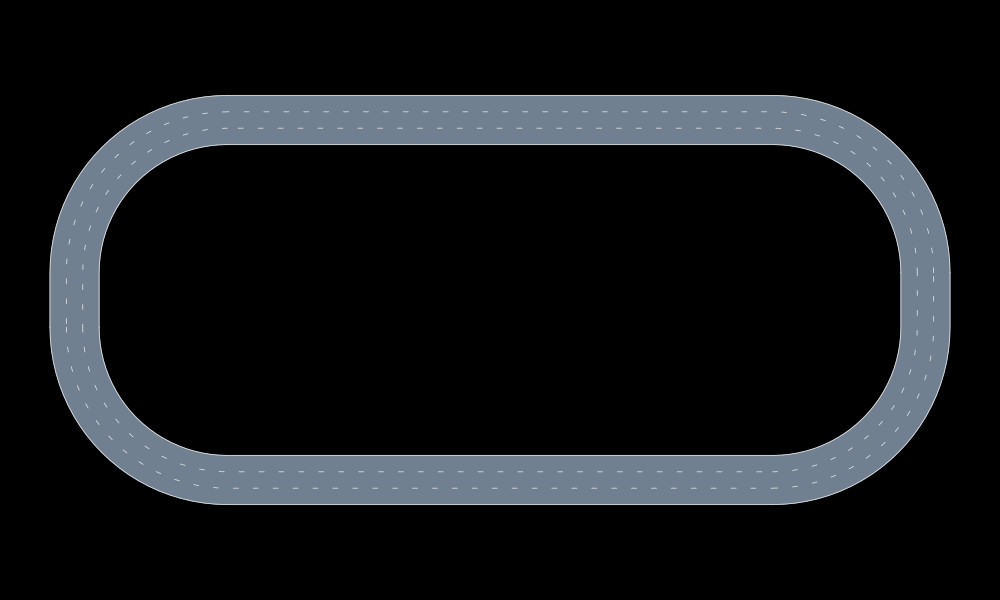

In [36]:
roadway = gen_stadium_roadway(3)

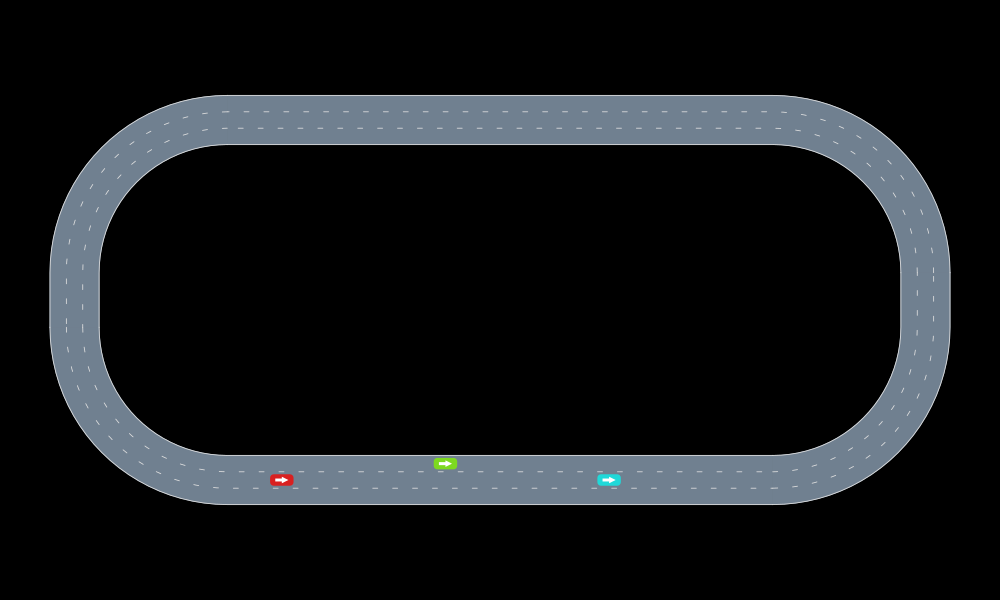

In [39]:
scene = Scene()
push!(scene,Vehicle(VehicleState(VecSE2(10.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 29.0), VehicleDef(), 1))
push!(scene,Vehicle(VehicleState(VecSE2(40.0,0.0,0.0), roadway, 22.0), VehicleDef(), 2))
push!(scene,Vehicle(VehicleState(VecSE2(70.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 27.0), VehicleDef(), 3))

car_colors = get_pastel_car_colors(scene)
cam = FitToContentCamera()
render(scene, roadway, cam=cam, car_colors=car_colors)

In [45]:
timestep = 0.1

model = Tim2DDriver(timestep,
        mlane = MOBIL(timestep),
    )
set_desired_speed!(model, 10.0)

for (i,veh) in enumerate(scene)
        observe!(model, scene, roadway, veh.id)
        @show rand(model)
end

# nticks = 100
# rec = SceneRecord(nticks+1, timestep)
# simulate!(rec, scene, roadway, model, nticks)
# render(rec[0], roadway, cam=cam, car_colors=car_colors)

rand(model) = LatLonAccel(-0.000, -9.000)
rand(model) = LatLonAccel(-0.000, -9.000)
rand(model) = LatLonAccel(-0.000, -9.000)
